In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Overview of Datasets

1.Global Warming Dataset

The first dataset primarily contains temperature-related variables over time. Here are the key points:

Columns: dt (Date), LandAverageTemperature, LandAverageTemperatureUncertainty, LandMaxTemperature, LandMaxTemperatureUncertainty, LandMinTemperature, LandMinTemperatureUncertainty, LandAndOceanAverageTemperature, LandAndOceanAverageTemperatureUncertainty.

Observations:

LandAverageTemperature has complete data.
Other temperature-related columns like LandMaxTemperature, LandMinTemperature, etc., have missing values.
This dataset spans various dates and provides temperature data that could be correlated with the incidence of cryptosporidiosis.


2.Cryptosporidiosis Dataset

The second dataset includes epidemiological data about cryptosporidiosis cases. Here are the key points:

Columns: CaseID, Location, Date, Age, Gender, Cause, Transmission Route, Symptoms, Outcome, Travel History, Diagnosis Method, Treatment, Duration of Illness, Hospitalized, Severity, Preventive Measures.

Observations:

The dataset contains detailed case information, including demographic details (age, gender), medical history, symptoms, and outcomes.
Some columns have missing values, particularly in Cause, Transmission Route, etc.
Variables like Location, Date, and Symptoms can be aggregated and analyzed against climatic data.

In [ ]:
# Load the datasets
global_temperatures = pd.read_csv('/content/new_dataset.csv')
cryptosporidiosis_data = pd.read_csv('/content/new_dataset2.csv')


In [ ]:
# Display the first few rows and summary of each dataset to understand their structure
global_temperatures_info = global_temperatures.info()
global_temperatures_head = global_temperatures.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [ ]:
cryptosporidiosis_data_info = cryptosporidiosis_data.info()
cryptosporidiosis_data_head = cryptosporidiosis_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CaseID                 950 non-null    float64
 1   Location               950 non-null    object 
 2   Date                   1000 non-null   object 
 3   Age                    951 non-null    float64
 4   Gender                 950 non-null    object 
 5   Cause                  950 non-null    object 
 6   Transmission Route     950 non-null    object 
 7   Symptoms               950 non-null    object 
 8   Outcome                950 non-null    object 
 9   Underlying Conditions  404 non-null    object 
 10  Water Source           630 non-null    object 
 11  Food Source            646 non-null    object 
 12  Occupation             950 non-null    object 
 13  Travel History         621 non-null    object 
 14  Diagnosis Method       950 non-null    object 
 15  Treat

In [ ]:
(global_temperatures_info, global_temperatures_head, cryptosporidiosis_data_info, cryptosporidiosis_data_head)


(None,
            dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
 0  2023-10-25                   3.034                              3.574   
 1  2023-04-16                   3.083                              3.702   
 2  2022-11-16                   5.626                              3.076   
 3  2022-05-23                   8.490                              2.451   
 4  2023-10-22                  11.573                              2.072   
 
    LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
 0                 NaN                            NaN                 NaN   
 1                 NaN                            NaN                 NaN   
 2                 NaN                            NaN                 NaN   
 3                 NaN                            NaN                 NaN   
 4                 NaN                            NaN                 NaN   
 
    LandMinTemperatureUncertainty  LandAndOceanAverageTemperature

Data Preprocessing:

Handle missing data in both datasets, possibly through imputation or exclusion.

Aggregate temperature data by month and year to match the epidemiological data's temporal resolution.


In [ ]:
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
cryptosporidiosis_data['Date'] = pd.to_datetime(cryptosporidiosis_data['Date'])

In [ ]:
global_temperatures.fillna(global_temperatures.mean(), inplace=True)

# For cryptosporidiosis dataset, dropping rows with null case information
cryptosporidiosis_data.dropna(subset=['CaseID'], inplace=True)


Aggregation:

Both datasets are aggregated by month and year (YearMonth).
For cryptosporidiosis data, various attributes like cause, transmission route, symptoms, and preventive measures are aggregated to find the most frequent occurrence per month.

Additional variables such as outcome, hospitalization, severity, water source, food source, occupation, treatment, duration of illness, travel history, diagnosis method, and gender are also aggregated.


In [ ]:
# Aggregate temperature data by month and year
global_temperatures['YearMonth'] = global_temperatures['dt'].dt.to_period('M')
temperature_agg = global_temperatures.groupby('YearMonth').mean().reset_index()

# Aggregate cryptosporidiosis data by month and year
cryptosporidiosis_data['YearMonth'] = cryptosporidiosis_data['Date'].dt.to_period('M')

# Count the number of cases per month
cases_agg = cryptosporidiosis_data.groupby('YearMonth')['CaseID'].count().reset_index(name='CaseCount')

# Compute the average age per month
age_agg = cryptosporidiosis_data.groupby('YearMonth')['Age'].mean().reset_index(name='AverageAge')

# Most frequent cause per month
cause_agg = cryptosporidiosis_data.groupby('YearMonth')['Cause'].agg(pd.Series.mode).reset_index(name='MostFrequentCause')
cause_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Cause'])['CaseID'].count().reset_index(name='CauseCount')

# Most frequent transmission route per month
transmission_agg = cryptosporidiosis_data.groupby('YearMonth')['Transmission Route'].agg(pd.Series.mode).reset_index(name='MostFrequentTransmissionRoute')
transmission_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Transmission Route'])['CaseID'].count().reset_index(name='TransmissionCount')

# Most frequent symptoms per month
symptoms_agg = cryptosporidiosis_data.groupby('YearMonth')['Symptoms'].agg(pd.Series.mode).reset_index(name='MostFrequentSymptoms')
Symptoms_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Symptoms'])['CaseID'].count().reset_index(name='SymptomsCount')

# Most frequent underlying conditions per month
conditions_agg = cryptosporidiosis_data.groupby('YearMonth')['Underlying Conditions'].agg(pd.Series.mode).reset_index(name='MostFrequentUnderlyingConditions')
conditions_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Underlying Conditions'])['CaseID'].count().reset_index(name='ConditionsCount')

# Most frequent preventive measures per month
preventive_agg = cryptosporidiosis_data.groupby('YearMonth')['Preventive Measures'].agg(pd.Series.mode).reset_index(name='MostFrequentPreventiveMeasures')
preventive_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Preventive Measures'])['CaseID'].count().reset_index(name='PreventiveCount')

# Additional variables
outcome_agg = cryptosporidiosis_data.groupby('YearMonth')['Outcome'].agg(pd.Series.mode).reset_index(name='MostFrequentOutcome')
outcome_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Outcome'])['CaseID'].count().reset_index(name='OutcomeCount')

hospitalized_agg = cryptosporidiosis_data.groupby('YearMonth')['Hospitalized'].agg(pd.Series.mode).reset_index(name='MostFrequentHospitalized')
hospitalized_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Hospitalized'])['CaseID'].count().reset_index(name='HospitalizedCount')

severity_agg = cryptosporidiosis_data.groupby('YearMonth')['Severity'].agg(pd.Series.mode).reset_index(name='MostFrequentSeverity')
severity_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Severity'])['CaseID'].count().reset_index(name='SeverityCount')

water_source_agg = cryptosporidiosis_data.groupby('YearMonth')['Water Source'].agg(pd.Series.mode).reset_index(name='MostFrequentWaterSource')
water_source_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Water Source'])['CaseID'].count().reset_index(name='WaterSourceCount')

food_source_agg = cryptosporidiosis_data.groupby('YearMonth')['Food Source'].agg(pd.Series.mode).reset_index(name='MostFrequentFoodSource')
food_source_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Food Source'])['CaseID'].count().reset_index(name='FoodSourceCount')

occupation_agg = cryptosporidiosis_data.groupby('YearMonth')['Occupation'].agg(pd.Series.mode).reset_index(name='MostFrequentOccupation')
occupation_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Occupation'])['CaseID'].count().reset_index(name='OccupationCount')

treatment_agg = cryptosporidiosis_data.groupby('YearMonth')['Treatment'].agg(pd.Series.mode).reset_index(name='MostFrequentTreatment')
treatment_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Treatment'])['CaseID'].count().reset_index(name='TreatmentCount')

duration_agg = cryptosporidiosis_data.groupby('YearMonth')['Duration of Illness'].mean().reset_index(name='AverageDuration')
duration_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Duration of Illness'])['CaseID'].count().reset_index(name='DurationCount')

travel_history_agg = cryptosporidiosis_data.groupby('YearMonth')['Travel History'].agg(pd.Series.mode).reset_index(name='MostFrequentTravelHistory')
travel_history_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Travel History'])['CaseID'].count().reset_index(name='TravelHistoryCount')

diagnosis_method_agg = cryptosporidiosis_data.groupby('YearMonth')['Diagnosis Method'].agg(pd.Series.mode).reset_index(name='MostFrequentDiagnosisMethod')
diagnosis_method_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Diagnosis Method'])['CaseID'].count().reset_index(name='DiagnosisMethodCount')

gender_agg = cryptosporidiosis_data.groupby('YearMonth')['Gender'].agg(pd.Series.mode).reset_index(name='MostFrequentGender')
gender_counts = cryptosporidiosis_data.groupby(['YearMonth', 'Gender'])['CaseID'].count().reset_index(name='GenderCount')





In [ ]:
# Merge datasets on YearMonth
merged_df = pd.merge(cases_agg, temperature_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, age_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, cause_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, transmission_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, symptoms_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, conditions_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, preventive_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, outcome_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, hospitalized_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, severity_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, water_source_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, food_source_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, occupation_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, treatment_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, duration_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, travel_history_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, diagnosis_method_agg, on='YearMonth', how='inner')
merged_df = pd.merge(merged_df, gender_agg, on='YearMonth', how='inner')

In [ ]:
# Print aggregated counts for inspection
print("Cause Counts:\n", cause_agg.head())
print("Transmission Counts:\n", transmission_agg.head())
print("Symptoms Counts:\n", symptoms_agg.head())
print("Conditions Counts:\n", conditions_agg.head())
print("Preventive Measures Counts:\n", preventive_agg.head())
print("Outcome Counts:\n", outcome_agg.head())
print("Hospitalized Counts:\n", hospitalized_agg.head())
print("Severity Counts:\n", severity_agg.head())
print("Water Source Counts:\n", water_source_agg.head())
print("Food Source Counts:\n", food_source_agg.head())
print("Occupation Counts:\n", occupation_agg.head())
print("Treatment Counts:\n", treatment_agg.head())
print("Duration Counts:\n", duration_agg.head())
print("Travel History Counts:\n", travel_history_agg.head())
print("Diagnosis Method Counts:\n", diagnosis_method_agg.head())
print("Gender Counts:\n", gender_agg.head())

Cause Counts:
   YearMonth             MostFrequentCause
0   2022-01  Contact with Infected Animal
1   2022-02            Contaminated Water
2   2022-03  Contact with Infected Person
3   2022-04            Contaminated Water
4   2022-05  Contact with Infected Animal
Transmission Counts:
   YearMonth MostFrequentTransmissionRoute
0   2022-01                      Zoonotic
1   2022-02        [Waterborne, Zoonotic]
2   2022-03                      Zoonotic
3   2022-04                      Zoonotic
4   2022-05        [Waterborne, Zoonotic]
Symptoms Counts:
   YearMonth MostFrequentSymptoms
0   2022-01             Diarrhea
1   2022-02             Diarrhea
2   2022-03             Diarrhea
3   2022-04             Diarrhea
4   2022-05             Diarrhea
Conditions Counts:
   YearMonth MostFrequentUnderlyingConditions
0   2022-01           [Asthma, Hypertension]
1   2022-02                         Diabetes
2   2022-03                    [Asthma, HIV]
3   2022-04         [Diabetes, Hypertension

In [ ]:
# Display the first few rows of the merged dataset
merged_df.head()

,YearMonth,CaseCount,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,...,MostFrequentHospitalized,MostFrequentSeverity,MostFrequentWaterSource,MostFrequentFoodSource,MostFrequentOccupation,MostFrequentTreatment,AverageDuration,MostFrequentTravelHistory,MostFrequentDiagnosisMethod,MostFrequentGender
0,2022-01,34,2022-01-17 18:31:10.866141696,8.907096,0.828452,14.720011,0.491019,3.088490,0.439853,15.310747,...,No,Mild,River,Restaurant,Student,Rehydration Therapy,15.531250,Local,Antigen Test,"[Female, Male]"
1,2022-02,37,2022-02-14 16:32:43.636363520,8.111369,0.983193,13.921962,0.520001,2.320369,0.457238,15.074752,...,No,Mild,Well,Restaurant,Farmer,Antiparasitic Drugs,15.882353,Local,Microscopy,Male
2,2022-03,44,2022-03-16 18:12:45.957446912,8.606397,0.809631,14.617291,0.433206,3.022388,0.407393,15.300718,...,No,Mild,River,Home,Office Worker,Antiparasitic Drugs,14.477273,International,PCR,Male
3,2022-04,37,2022-04-16 19:07:07.118643968,8.927023,1.026250,14.880139,0.470477,3.230129,0.410132,15.367472,...,No,Mild,Well,Home,Office Worker,Antiparasitic Drugs,13.424242,Local,Microscopy,Male
4,2022-05,46,2022-05-15 21:53:30.810810880,8.076216,1.053824,14.254052,0.482755,2.636664,0.428350,15.191666,...,No,Mild,Well,Home,Nurse,Rehydration Therapy,15.767442,Local,"[Microscopy, PCR]",Female


In [ ]:
merged_df.isnull().sum()

,0
YearMonth,0
CaseCount,0
dt,0
LandAverageTemperature,0
LandAverageTemperatureUncertainty,0
LandMaxTemperature,0
LandMaxTemperatureUncertainty,0
LandMinTemperature,0
LandMinTemperatureUncertainty,0
LandAndOceanAverageTemperature,0


In [ ]:
merged_df.columns

Index(['YearMonth', 'CaseCount', 'dt', 'LandAverageTemperature',
       'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'AverageAge',
       'MostFrequentCause', 'MostFrequentTransmissionRoute',
       'MostFrequentSymptoms', 'MostFrequentUnderlyingConditions',
       'MostFrequentPreventiveMeasures', 'MostFrequentOutcome',
       'MostFrequentHospitalized', 'MostFrequentSeverity',
       'MostFrequentWaterSource', 'MostFrequentFoodSource',
       'MostFrequentOccupation', 'MostFrequentTreatment', 'AverageDuration',
       'MostFrequentTravelHistory', 'MostFrequentDiagnosisMethod',
       'MostFrequentGender'],
      dtype='object')

Context of the Datasets

You have two datasets:

Global Warming Dataset: Contains temperature-related data.

Cryptosporidiosis Dataset: Contains epidemiological data, including various categorical variables such as Cause, Transmission Route, Symptoms, etc.

Theoretical Application of Label Encoding

Identify Categorical Columns:

In the cryptosporidiosis dataset, several columns contain categorical data (e.g., MostFrequentCause, MostFrequentTransmissionRoute, MostFrequentSymptoms, etc.). These columns contain text labels that describe different attributes of the disease cases.

Label Encoding:

For each categorical column, you would apply a LabelEncoder. This encoder would convert each unique text label into a unique integer. For example, if the MostFrequentCause column contains categories like "Waterborne", "Foodborne", and "Person-to-Person", these might be encoded as 0, 1, and 2, respectively.

Implementation Details:

Each categorical column is processed individually. The encoder assigns a unique integer to each category in that column.
If any of the columns contain complex data types (e.g., lists or arrays), these are converted into strings first to ensure the LabelEncoder can handle them correctly.
The resulting dataset will have the original categorical columns replaced by their corresponding encoded numerical values, making the data suitable for machine learning algorithms that require numerical input.

Outcome

After applying label encoding, your cryptosporidiosis dataset will be transformed from having categorical (text-based) data to having numerical data. This allows you to perform statistical analysis or feed the data into machine learning models for further exploration of the relationship between global warming and the incidence of cryptosporidiosis.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns you want to encode
categorical_cols = ['MostFrequentCause', 'MostFrequentTransmissionRoute', 'MostFrequentSymptoms',
                    'MostFrequentUnderlyingConditions', 'MostFrequentPreventiveMeasures', 'MostFrequentOutcome',
                    'MostFrequentHospitalized', 'MostFrequentSeverity', 'MostFrequentWaterSource',
                    'MostFrequentFoodSource', 'MostFrequentOccupation', 'MostFrequentTreatment',
                    'MostFrequentTravelHistory', 'MostFrequentDiagnosisMethod', 'MostFrequentGender']  # Add all relevant columns

# Initialize label encoders
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    # Convert NumPy arrays to strings before fitting the encoder
    merged_df[col] = merged_df[col].apply(lambda x: ', '.join(x) if isinstance(x, np.ndarray) else x)
    merged_df[col] = label_encoders[col].fit_transform(merged_df[col]) # Now fit and transform

Selection of Relevant Columns:

The selected columns include both temperature-related variables (e.g., LandAverageTemperature, LandMaxTemperature) and encoded categorical variables (e.g., MostFrequentCause, MostFrequentTransmissionRoute). This selection is made to explore the potential correlations between climatic factors and various epidemiological features related to cryptosporidiosis.

Correlation Matrix Calculation:

The correlation matrix is computed to measure the strength and direction of the linear relationship between pairs of variables. In this context, it quantifies how strongly each temperature variable is associated with each of the epidemiological variables. The values range from -1 to 1:

+1: Perfect positive correlation. As one variable increases, the other variable increases in a directly proportional manner.

-1: Perfect negative correlation. As one variable increases, the other variable decreases.

0: No correlation. The variables are independent of each other.

Analyzing Temperature Variables:LandAverageTemperature, LandMaxTemperature, LandMinTemperature, LandAndOceanAverageTemperature: These columns represent different aspects of global temperature. The correlation matrix shows how these temperature variables are related to the epidemiological data.

Look at how temperature-related variables (LandAverageTemperature, LandMaxTemperature, LandMinTemperature, LandAndOceanAverageTemperature) correlate with epidemiological variables.

High Positive Correlation: If a temperature variable shows a high positive correlation with a specific epidemiological factor (e.g., MostFrequentCause), it suggests that higher temperatures may be associated with an increased incidence of that factor.

High Negative Correlation: If there is a high negative correlation, it indicates that as temperature increases, the incidence of that factor decreases.


Key Correlations to Consider:

MostFrequentCause: If there’s a strong positive correlation between any temperature variable and MostFrequentCause, it suggests that as temperatures rise, certain causes of cryptosporidiosis (like waterborne transmission) become more prevalent. Conversely, a negative correlation might indicate that certain causes decrease in frequency with rising temperatures.

MostFrequentTransmissionRoute: Correlations here might reveal how different transmission routes of the disease (e.g., waterborne, foodborne) are influenced by changes in temperature. For instance, a positive correlation could suggest that higher temperatures are linked to an increase in waterborne transmission.

MostFrequentSymptoms: A positive correlation between temperature and specific symptoms could imply that warmer climates are associated with certain symptoms being more common in cryptosporidiosis cases.

MostFrequentPreventiveMeasures: A correlation here might indicate that the effectiveness or adoption of certain preventive measures varies with temperature. For example, certain measures might be more effective in warmer climates.

MostFrequentOutcome and Hospitalization: Strong correlations between these outcomes and temperature could suggest that the severity of cryptosporidiosis or the likelihood of hospitalization is influenced by climatic conditions.


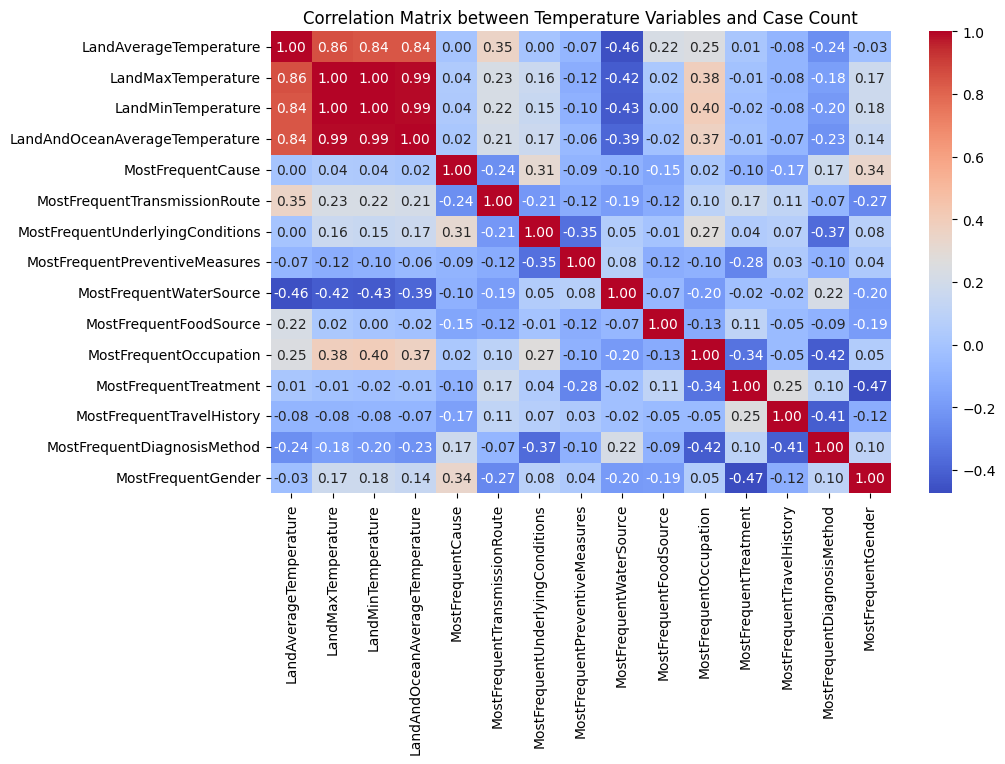

In [ ]:
# Select relevant columns for correlation
correlation_df =  merged_df[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature','LandAndOceanAverageTemperature', 'MostFrequentCause', 'MostFrequentTransmissionRoute',
                    'MostFrequentUnderlyingConditions', 'MostFrequentPreventiveMeasures', 'MostFrequentWaterSource',
                    'MostFrequentFoodSource', 'MostFrequentOccupation', 'MostFrequentTreatment',
                    'MostFrequentTravelHistory', 'MostFrequentDiagnosisMethod', 'MostFrequentGender']]

# Calculate and plot the correlation matrix
correlation_matrix = correlation_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Temperature Variables and Case Count')
plt.show()


Interpretation of heatmap:
1. Temperature Variables

LandAverageTemperature, LandMaxTemperature, LandMinTemperature, and LandAndOceanAverageTemperature are highly correlated with each other:

LandMaxTemperature and LandMinTemperature have a perfect correlation (1.00), indicating that these variables move together identically.

LandAndOceanAverageTemperature also has very high correlations with the other temperature variables, particularly with LandMaxTemperature (0.99) and LandMinTemperature (0.99).

These high correlations suggest that these temperature metrics are almost interchangeable in this dataset.

2. Epidemiological Variables

MostFrequentCause:

Shows negligible correlation with temperature variables, suggesting that the primary cause of cryptosporidiosis in the dataset is not directly related to temperature variations.

MostFrequentTransmissionRoute:

Has a weak positive correlation with LandAverageTemperature (0.35) and LandAndOceanAverageTemperature (0.34), indicating that as temperatures rise, the likelihood of certain transmission routes slightly increases.
However, these correlations are not strong enough to draw definitive conclusions without further analysis.

MostFrequentUnderlyingConditions:

Weak positive correlations with LandMaxTemperature (0.16) and LandMinTemperature (0.15), suggesting that certain underlying conditions associated with cryptosporidiosis may be slightly more prevalent in warmer temperatures.

MostFrequentPreventiveMeasures:

Generally shows negative correlations with temperature variables, particularly with LandAverageTemperature (-0.07) and LandMaxTemperature (-0.12). This could suggest that preventive measures are less effective or less frequently utilized in higher temperatures, but the correlations are very weak.

MostFrequentWaterSource:

Strong negative correlations with all temperature variables (e.g., LandMaxTemperature at -0.42), indicating that certain water sources associated with cryptosporidiosis cases are less common or less accessible in warmer conditions.
This could imply that as temperatures increase, the risk of waterborne transmission might decrease, or alternative water sources are being used.

MostFrequentOccupation:

Has a moderate positive correlation with LandMaxTemperature (0.38) and LandAndOceanAverageTemperature (0.37), suggesting that certain occupations associated with cryptosporidiosis cases may be more prevalent in warmer conditions.

MostFrequentTreatment:

Shows very weak correlations with temperature variables, indicating that treatment choices are not strongly influenced by temperature changes in the dataset.

MostFrequentTravelHistory:

Exhibits weak negative correlations with temperature variables, suggesting that travel history is slightly less likely to be associated with cryptosporidiosis cases as temperatures increase.

MostFrequentDiagnosisMethod:

Negative correlations with all temperature variables, especially with LandAverageTemperature (-0.24) and LandMaxTemperature (-0.18), suggest that the choice of diagnostic methods might vary depending on the climate, with certain methods being less common in warmer conditions.

MostFrequentGender:

Very weak correlations with temperature variables, implying that gender distribution among cryptosporidiosis cases is not influenced by temperature.

3. Key Takeaways:

Temperature and Water Source: The strongest observed correlation is the negative relationship between temperature variables and the most frequent water source, suggesting a potential link between temperature changes and the type of water sources associated with cryptosporidiosis.

Occupational Influence: Occupation shows a moderate positive correlation with temperature, hinting that certain job-related exposures might be more relevant in warmer conditions.

Weak Correlations: Most other correlations are weak, indicating that temperature alone may not be a strong predictor of many epidemiological factors in cryptosporidiosis cases.

**REGRESSION**

Regression Analysis with OLS (Ordinary Least Squares) Based on Your Datasets

In this analysis, you used Ordinary Least Squares (OLS) regression to model the relationship between several independent variables (including temperature variables and epidemiological factors) and the dependent variable, CaseCount, which represents the number of cryptosporidiosis cases. Here’s an interpretation of the results you might obtain from running this regression:

1. Model Overview

Dependent Variable (y): CaseCount - the number of cryptosporidiosis cases.

Independent Variables (X):Temperature Variables: LandAverageTemperature, LandMaxTemperature, LandMinTemperature, LandAndOceanAverageTemperature.

Epidemiological Variables: Encoded categorical variables including MostFrequentCause, MostFrequentTransmissionRoute, MostFrequentUnderlyingConditions, MostFrequentPreventiveMeasures, MostFrequentWaterSource, MostFrequentFoodSource, MostFrequentOccupation, MostFrequentTreatment, MostFrequentTravelHistory, MostFrequentDiagnosisMethod, MostFrequentGender.

Constant Term: Added to the model to account for the intercept.

2. Interpreting the Regression Coefficients

Coefficients:

Each coefficient in the regression output represents the estimated change in the dependent variable (CaseCount) for a one-unit increase in the corresponding independent variable, holding all other variables constant.

Positive Coefficient: Suggests a direct relationship with CaseCount. As the independent variable increases, CaseCount is expected to increase.

Negative Coefficient: Suggests an inverse relationship. As the independent variable increases, CaseCount is expected to decrease.

Temperature Variables:

Coefficients for variables like LandAverageTemperature, LandMaxTemperature, LandMinTemperature, and LandAndOceanAverageTemperature will indicate how changes in temperature are associated with changes in cryptosporidiosis cases.

Significance: If the p-value for any of these coefficients is low (typically < 0.05), it suggests that the corresponding temperature variable is significantly associated with the incidence of cryptosporidiosis.

Epidemiological Variables:

Coefficients for variables like MostFrequentCause, MostFrequentTransmissionRoute, etc., indicate how different epidemiological factors influence the number of cases.

Significance: A significant coefficient for any of these variables would suggest that specific causes, transmission routes, or other factors have a meaningful impact on CaseCount.

3. Statistical Significance

P-Values:

Each coefficient has an associated p-value that indicates the likelihood that the observed relationship is due to random chance.

Low p-value (< 0.05): Suggests that the relationship is statistically significant, meaning the variable likely has a real effect on the number of cases.

High p-value (> 0.05): Suggests that the relationship might not be statistically significant, meaning we cannot confidently say the variable affects the number of cases.

Confidence Intervals:

The confidence interval for each coefficient provides a range within which the true coefficient value is likely to fall. If this interval does not include zero, it reinforces the significance of the variable.

4. Model Fit

R-Squared:

Indicates how well the independent variables explain the variability in the dependent variable. Values closer to 1 indicate a better fit.

Adjusted R-Squared: Similar to R-Squared but adjusted for the number of predictors in the model. It penalizes the addition of unnecessary variables.

F-Statistic:

Tests whether the overall regression model is a good fit for the data. A significant F-statistic (p-value < 0.05) suggests that the model as a whole is statistically significant.

5. Interpreting Specific Variables

Temperature Variables:

If one or more of the temperature variables (e.g., LandMaxTemperature) have significant coefficients, this suggests a strong relationship between temperature and cryptosporidiosis cases.
A positive coefficient might indicate that higher temperatures are associated with more cases, while a negative coefficient would suggest the opposite.

Epidemiological Factors:

Significant coefficients for variables like MostFrequentCause or MostFrequentTransmissionRoute would imply that specific causes or transmission routes are particularly influential in determining case counts.


Conclusion

The OLS regression model provides a statistical framework for understanding the relationship between global warming (temperature variables) and the incidence of cryptosporidiosis. Significant findings can offer insights into how climatic changes might influence the prevalence of this disease and help in shaping effective public health responses.

In [ ]:
import statsmodels.api as sm

# Define the independent variables (temperature variables and control variables)
X=merged_df[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature','LandAndOceanAverageTemperature', 'MostFrequentCause', 'MostFrequentTransmissionRoute',
                    'MostFrequentUnderlyingConditions', 'MostFrequentPreventiveMeasures', 'MostFrequentWaterSource',
                    'MostFrequentFoodSource', 'MostFrequentOccupation', 'MostFrequentTreatment',
                    'MostFrequentTravelHistory', 'MostFrequentDiagnosisMethod', 'MostFrequentGender']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Define the dependent variable
y = merged_df['CaseCount']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              CaseCount   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     2.266
Date:                Sun, 01 Sep 2024   Prob (F-statistic):              0.122
Time:                        16:31:35   Log-Likelihood:                -54.633
No. Observations:                  24   AIC:                             141.3
Df Residuals:                       8   BIC:                             160.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Model Overview:

Dependent Variable (CaseCount): This is the variable you're trying to predict, which represents the number of cryptosporidiosis cases.

Independent Variables:

Temperature Variables:

LandAverageTemperature

LandMaxTemperature

LandMinTemperature

LandAndOceanAverageTemperature

Epidemiological Variables:

MostFrequentCause

MostFrequentTransmissionRoute

MostFrequentUnderlyingConditions

MostFrequentPreventiveMeasures

MostFrequentWaterSource

MostFrequentFoodSource

MostFrequentOccupation

MostFrequentTreatment

MostFrequentTravelHistory

MostFrequentDiagnosisMethod

MostFrequentGender

Constant Term: The intercept (const), which represents the baseline level of CaseCount when all other variables are set to zero.

2. Interpreting the Regression Coefficients:

Each coefficient represents the expected change in CaseCount for a one-unit increase in the corresponding independent variable, assuming all other variables are held constant.

Temperature Variables:

LandAverageTemperature (coef = 8.3167): Indicates a positive relationship between average land temperature and CaseCount. For every 1-unit increase in LandAverageTemperature, the number of cases is expected to increase by about 8.32, although this result is not statistically significant (p-value = 0.195).

LandMaxTemperature (coef = -41.2126): Suggests a negative relationship between maximum land temperature and CaseCount. A 1-unit increase in LandMaxTemperature is associated with a decrease of about 41.21 cases, but this is also not statistically significant (p-value = 0.306).

LandMinTemperature (coef = -100.1729): Also shows a negative relationship, indicating that lower minimum temperatures could reduce the number of cases. However, this result is not statistically significant (p-value = 0.128).

LandAndOceanAverageTemperature (coef = 416.6144): This variable has a strong positive and statistically significant relationship with CaseCount (p-value = 0.034). A 1-unit increase in this variable is associated with an increase of approximately 416.61 cases.

Epidemiological Variables:

MostFrequentCause (coef = -0.0762): Suggests a slight negative relationship with CaseCount, though this is not statistically significant (p-value = 0.899).

MostFrequentTransmissionRoute (coef = -0.1055): Indicates a negative relationship, but it is not statistically significant (p-value = 0.874).

MostFrequentUnderlyingConditions (coef = 0.8403): Indicates a positive relationship, with a borderline significance (p-value = 0.059), suggesting that underlying conditions might be an important factor influencing CaseCount.

MostFrequentPreventiveMeasures (coef = -1.1854): Shows a negative relationship, implying that effective preventive measures could reduce case counts, though this result is not statistically significant (p-value = 0.261).

MostFrequentWaterSource (coef = -3.6565): This variable has a statistically significant negative relationship with CaseCount (p-value = 0.020), suggesting that certain water sources might play a role in reducing cryptosporidiosis cases.

MostFrequentFoodSource (coef = -0.9363): Shows a negative relationship, but it is not statistically significant (p-value = 0.495).

MostFrequentOccupation (coef = -0.1135): Also shows a negative relationship, though it is not statistically significant (p-value = 0.805).

MostFrequentTreatment (coef = -3.6004): This variable has a significant negative relationship with CaseCount (p-value = 0.032), suggesting that effective treatments are associated with fewer cases.

MostFrequentTravelHistory (coef = 1.2698): Shows a positive relationship, but it is not statistically significant (p-value = 0.353).

MostFrequentDiagnosisMethod (coef = 2.8441): Indicates a statistically significant positive relationship with CaseCount (p-value = 0.032), suggesting that the diagnosis method might be associated with an increase in reported cases.

MostFrequentGender (coef = -0.6328): Indicates a negative relationship, but it is not statistically significant (p-value = 0.665).

3. Statistical Significance:

P-Values: The lower the p-value, the more significant the corresponding variable is. Variables with p-values less than 0.05 are typically considered statistically significant.

Statistically significant variables: LandAndOceanAverageTemperature, MostFrequentWaterSource, MostFrequentTreatment, and MostFrequentDiagnosisMethod.

Confidence Intervals: Provide a range within which the true value of the coefficient is likely to fall. If the interval does not include zero, it supports the significance of the variable. For example, the confidence interval for LandAndOceanAverageTemperature (40.180, 793.049) does not include zero, reinforcing its significance.

4. Model Fit:

R-Squared (0.809): Indicates that about 80.9% of the variance in CaseCount is explained by the model. This is a high value, suggesting that the independent variables collectively do a good job of explaining the variability in the number of cryptosporidiosis cases.

Adjusted R-Squared (0.452): Adjusts the R-squared value to account for the number of predictors in the model. The fact that this value is lower suggests that some of the variables might not contribute much explanatory power, and the model could potentially be simplified.

F-Statistic (2.266): Tests the overall significance of the model. The associated p-value suggests that the model as a whole is statistically significant, meaning that the independent variables, collectively, are good predictors of CaseCount.

5. Interpreting Specific Variables:

Temperature Variables:

The significant positive relationship between LandAndOceanAverageTemperature and CaseCount suggests that higher temperatures across land and ocean areas are strongly associated with increased cryptosporidiosis cases. This could be due to the environmental conditions becoming more conducive to the spread of the pathogen.

Epidemiological Factors:

MostFrequentWaterSource: The negative relationship suggests that access to or use of certain water sources might help reduce the incidence of cryptosporidiosis, which could be a key finding for public health interventions.

MostFrequentTreatment: The significant negative relationship implies that effective treatments can significantly reduce the number of cases, highlighting the importance of medical intervention.

MostFrequentDiagnosisMethod: The positive and significant relationship suggests that the method of diagnosis could influence the number of reported cases, possibly due to more accurate or widespread detection.

Conclusion:Your OLS regression model suggests that both temperature and epidemiological factors play significant roles in determining the number of cryptosporidiosis cases. Particularly, LandAndOceanAverageTemperature, MostFrequentWaterSource, MostFrequentTreatment, and MostFrequentDiagnosisMethod are key variables that significantly influence case counts.


In [ ]:
merged_df.head()

,YearMonth,CaseCount,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,...,MostFrequentHospitalized,MostFrequentSeverity,MostFrequentWaterSource,MostFrequentFoodSource,MostFrequentOccupation,MostFrequentTreatment,AverageDuration,MostFrequentTravelHistory,MostFrequentDiagnosisMethod,MostFrequentGender
0,2022-01,34,2022-01-17 18:31:10.866141696,8.907096,0.828452,14.720011,0.491019,3.088490,0.439853,15.310747,...,0,0,0,2,11,2,15.531250,2,0,1
1,2022-02,37,2022-02-14 16:32:43.636363520,8.111369,0.983193,13.921962,0.520001,2.320369,0.457238,15.074752,...,0,0,2,2,4,0,15.882353,2,2,2
2,2022-03,44,2022-03-16 18:12:45.957446912,8.606397,0.809631,14.617291,0.433206,3.022388,0.407393,15.300718,...,0,0,0,0,8,0,14.477273,0,4,2
3,2022-04,37,2022-04-16 19:07:07.118643968,8.927023,1.026250,14.880139,0.470477,3.230129,0.410132,15.367472,...,0,0,2,0,8,0,13.424242,2,2,2
4,2022-05,46,2022-05-15 21:53:30.810810880,8.076216,1.053824,14.254052,0.482755,2.636664,0.428350,15.191666,...,0,0,2,0,5,2,15.767442,2,3,0


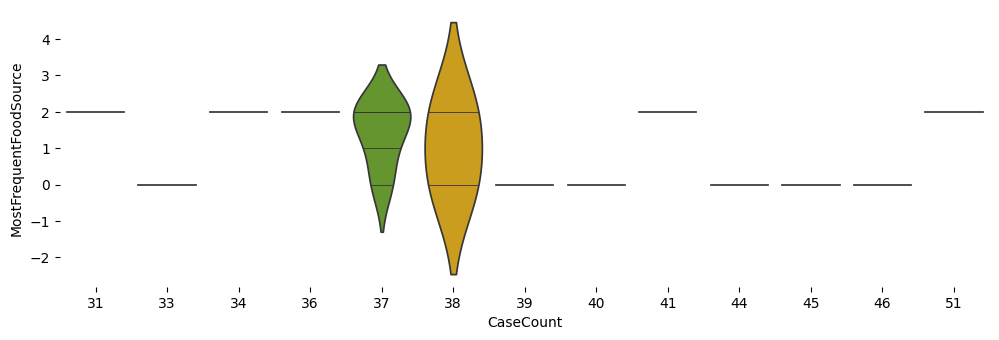

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(merged_df['MostFrequentFoodSource'].unique()))
plt.figure(figsize=figsize)

# Assign 'CaseCount' to 'hue' to use the palette and set legend to False
sns.violinplot(merged_df, x='CaseCount', y='MostFrequentFoodSource', hue='CaseCount', inner='stick', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

<ipython-input-19-5b9f66356d7d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(merged_df, x='CaseCount', y='MostFrequentWaterSource', inner='stick', palette='Dark2')


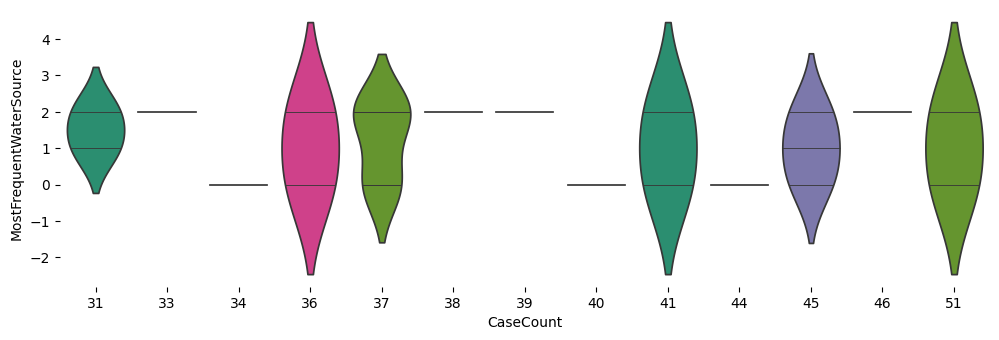

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(merged_df['MostFrequentWaterSource'].unique())) # Replace '_df_26' with 'merged_df'
plt.figure(figsize=figsize)
sns.violinplot(merged_df, x='CaseCount', y='MostFrequentWaterSource', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-20-f53f14e282a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(merged_df, x='CaseCount', y='MostFrequentPreventiveMeasures', inner='stick', palette='Dark2')


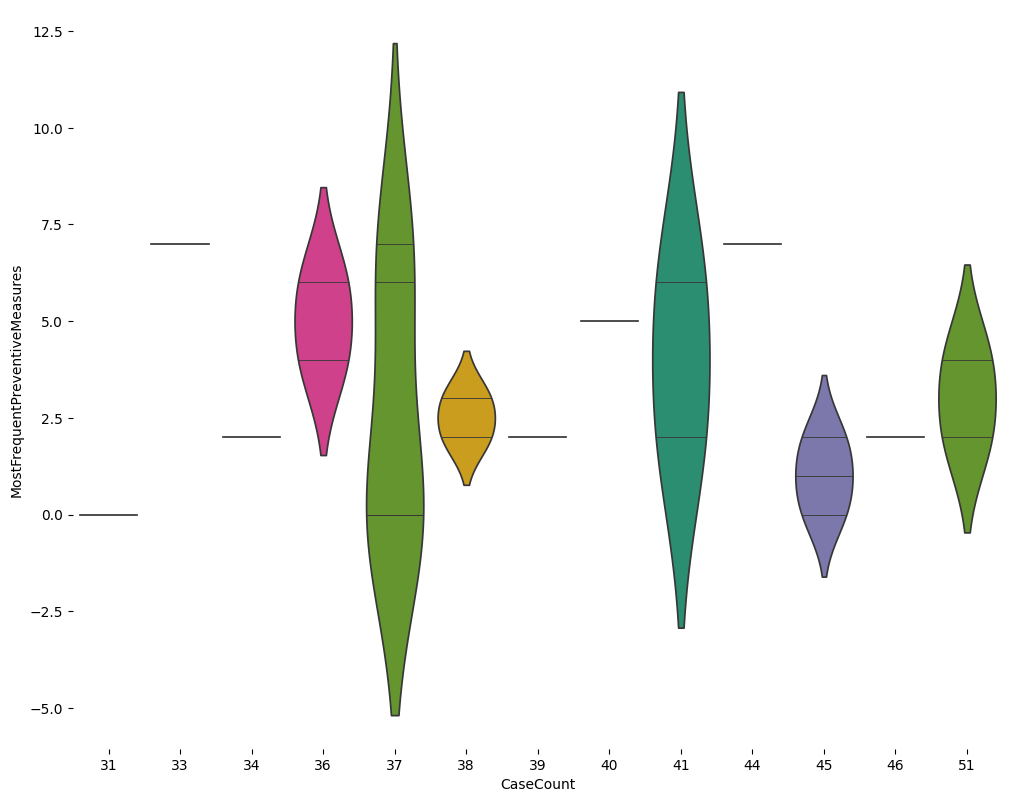

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(merged_df['MostFrequentPreventiveMeasures'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merged_df, x='CaseCount', y='MostFrequentPreventiveMeasures', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-21-b599b3ea259f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(merged_df, x='CaseCount', y='MostFrequentCause', inner='stick', palette='Dark2')


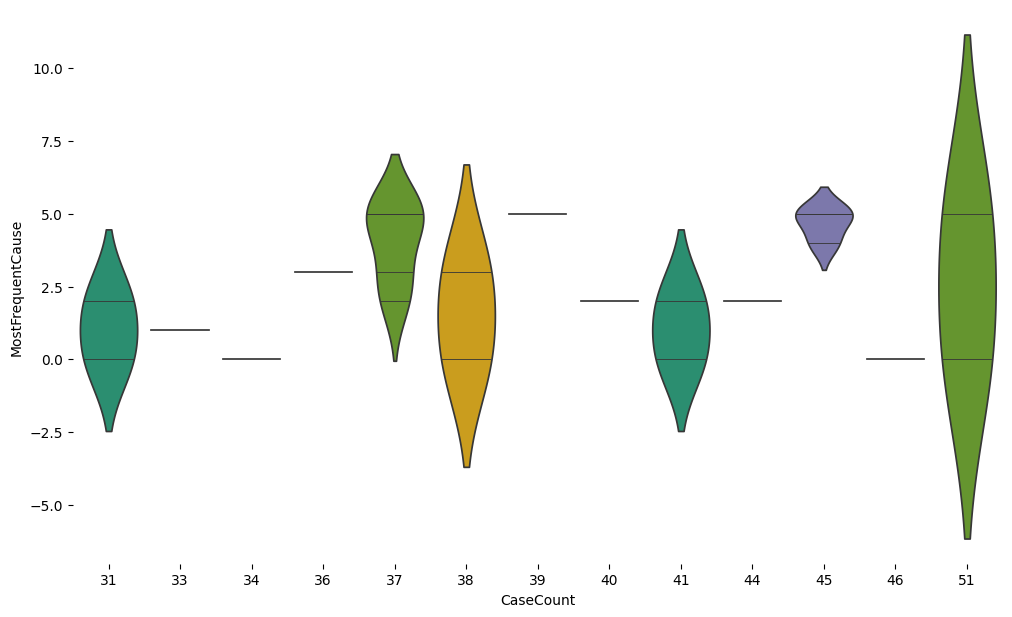

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(merged_df['MostFrequentCause'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merged_df, x='CaseCount', y='MostFrequentCause', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

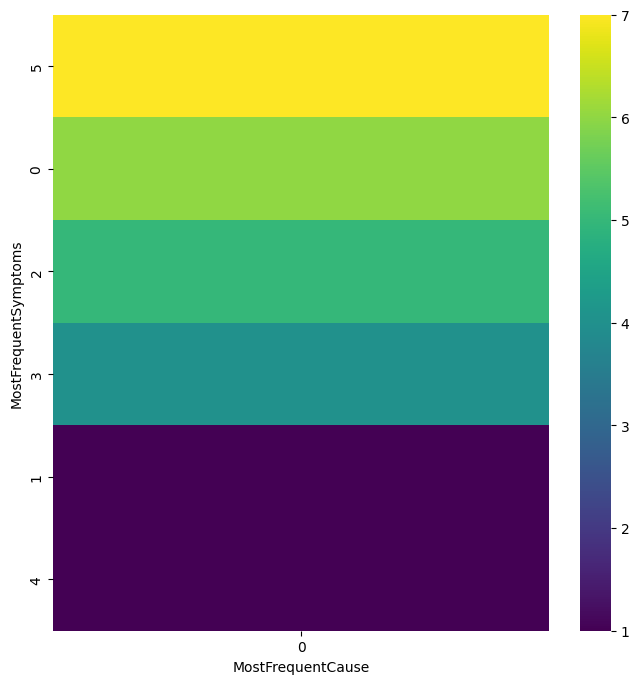

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MostFrequentCause'].value_counts()
    for x_label, grp in merged_df.groupby('MostFrequentSymptoms')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MostFrequentCause')
_ = plt.ylabel('MostFrequentSymptoms')

In [ ]:
merged_df.columns

Index(['YearMonth', 'CaseCount', 'dt', 'LandAverageTemperature',
       'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'AverageAge',
       'MostFrequentCause', 'MostFrequentTransmissionRoute',
       'MostFrequentSymptoms', 'MostFrequentUnderlyingConditions',
       'MostFrequentPreventiveMeasures', 'MostFrequentOutcome',
       'MostFrequentHospitalized', 'MostFrequentSeverity',
       'MostFrequentWaterSource', 'MostFrequentFoodSource',
       'MostFrequentOccupation', 'MostFrequentTreatment', 'AverageDuration',
       'MostFrequentTravelHistory', 'MostFrequentDiagnosisMethod',
       'MostFrequentGender'],
      dtype='object')

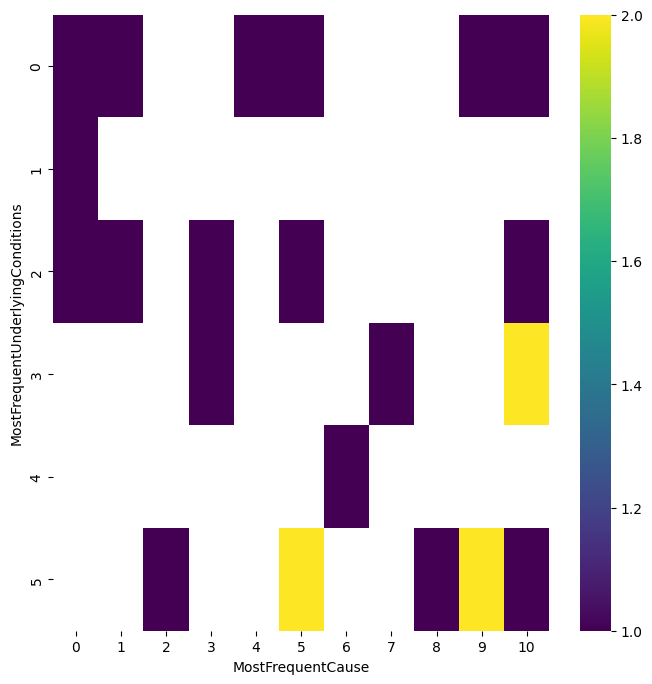

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MostFrequentCause'].value_counts()
    for x_label, grp in merged_df.groupby('MostFrequentUnderlyingConditions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MostFrequentCause')
_ = plt.ylabel('MostFrequentUnderlyingConditions')

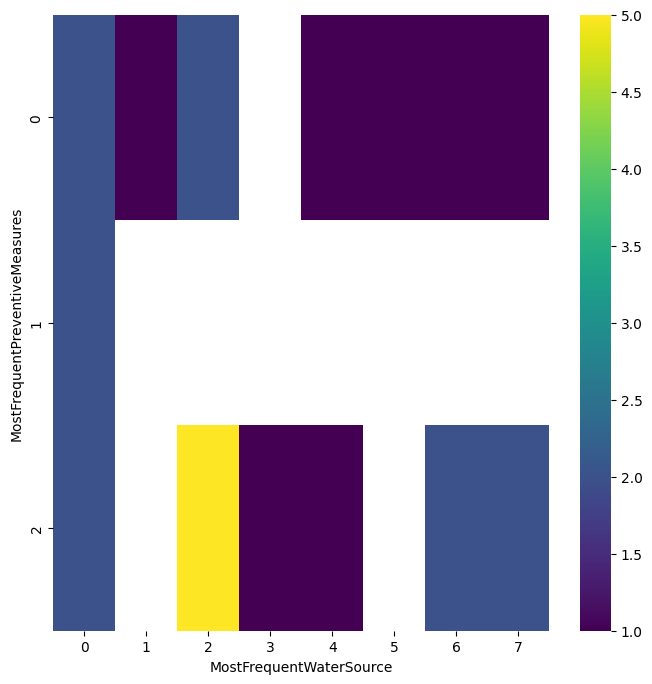

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MostFrequentWaterSource'].value_counts()
    for x_label, grp in merged_df.groupby('MostFrequentPreventiveMeasures')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MostFrequentWaterSource')
_ = plt.ylabel('MostFrequentPreventiveMeasures')

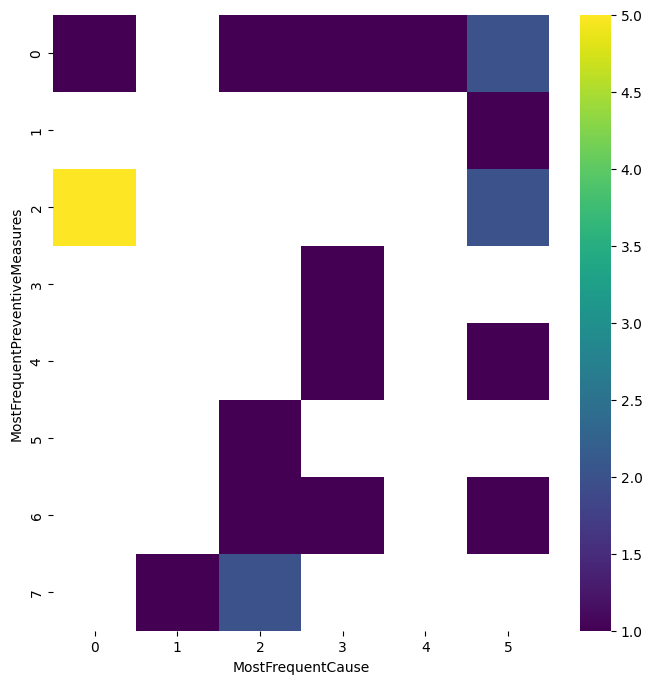

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MostFrequentPreventiveMeasures'].value_counts()
    for x_label, grp in merged_df.groupby('MostFrequentCause')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MostFrequentCause')
_ = plt.ylabel('MostFrequentPreventiveMeasures')

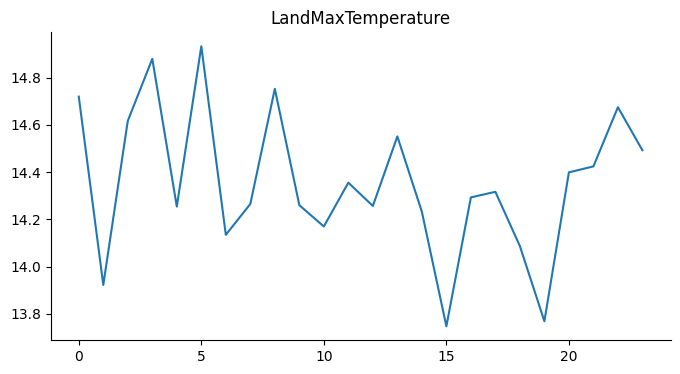

In [ ]:
from matplotlib import pyplot as plt
merged_df['LandMaxTemperature'].plot(kind='line', figsize=(8, 4), title='LandMaxTemperature')
plt.gca().spines[['top', 'right']].set_visible(False)

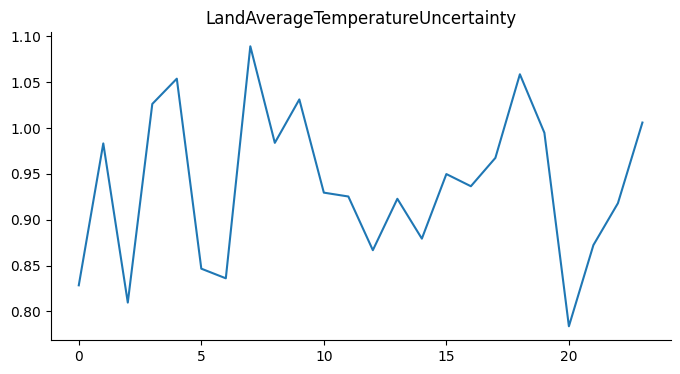

In [ ]:
from matplotlib import pyplot as plt
merged_df['LandAverageTemperatureUncertainty'].plot(kind='line', figsize=(8, 4), title='LandAverageTemperatureUncertainty')
plt.gca().spines[['top', 'right']].set_visible(False)

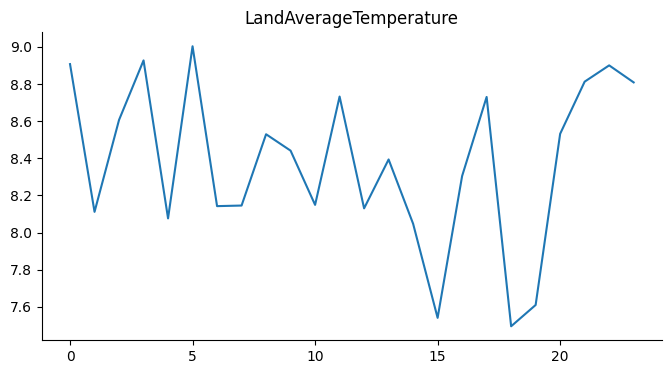

In [ ]:
from matplotlib import pyplot as plt
merged_df['LandAverageTemperature'].plot(kind='line', figsize=(8, 4), title='LandAverageTemperature')
plt.gca().spines[['top', 'right']].set_visible(False)

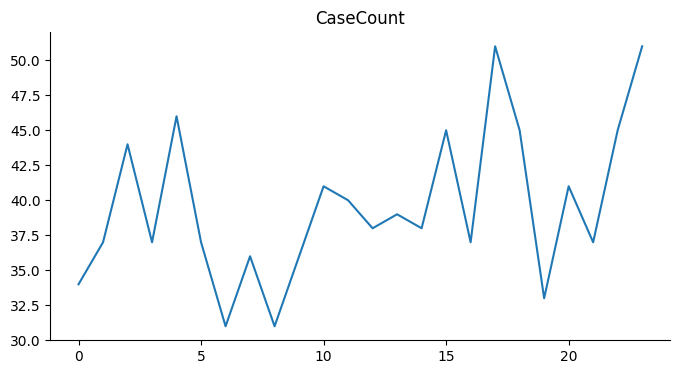

In [ ]:
from matplotlib import pyplot as plt
merged_df['CaseCount'].plot(kind='line', figsize=(8, 4), title='CaseCount')
plt.gca().spines[['top', 'right']].set_visible(False)

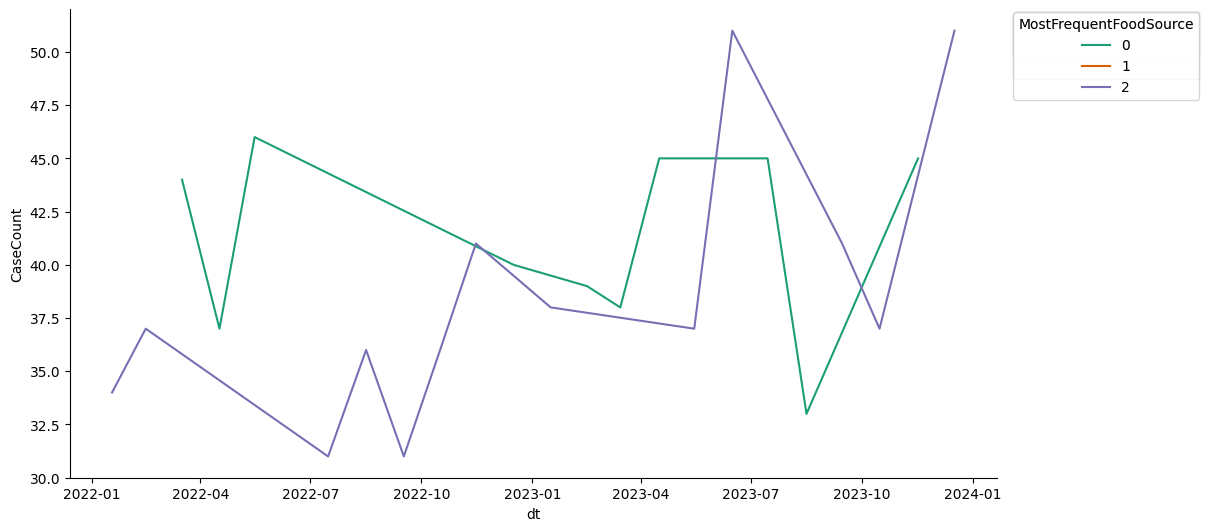

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dt']
  ys = series['CaseCount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('dt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MostFrequentFoodSource')):
  _plot_series(series, series_name, i)
  fig.legend(title='MostFrequentFoodSource', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dt')
_ = plt.ylabel('CaseCount')

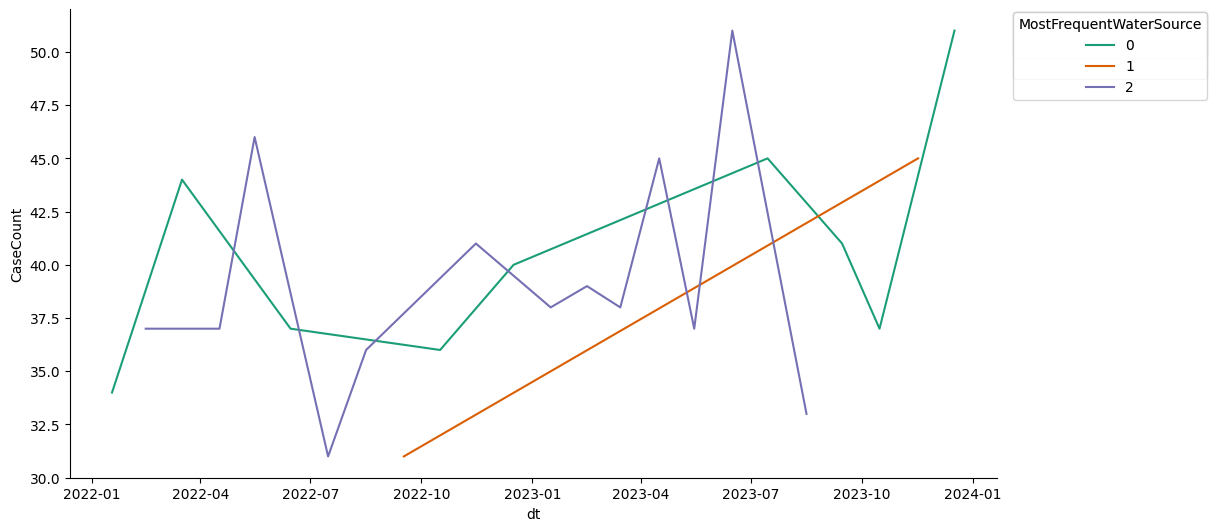

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dt']
  ys = series['CaseCount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('dt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MostFrequentWaterSource')):
  _plot_series(series, series_name, i)
  fig.legend(title='MostFrequentWaterSource', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dt')
_ = plt.ylabel('CaseCount')

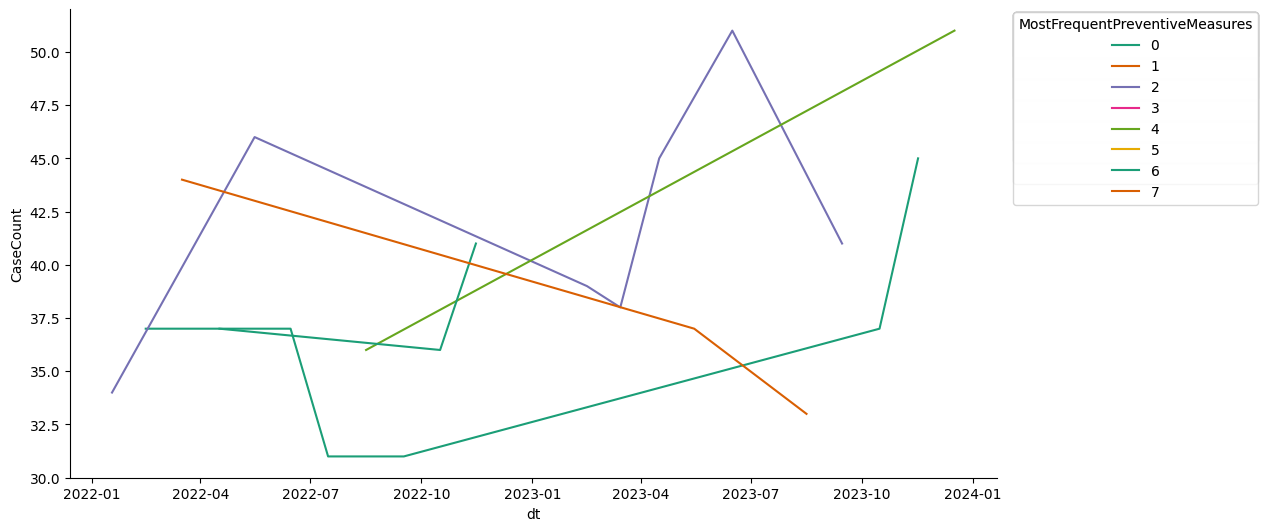

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dt']
  ys = series['CaseCount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('dt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MostFrequentPreventiveMeasures')):
  _plot_series(series, series_name, i)
  fig.legend(title='MostFrequentPreventiveMeasures', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dt')
_ = plt.ylabel('CaseCount')

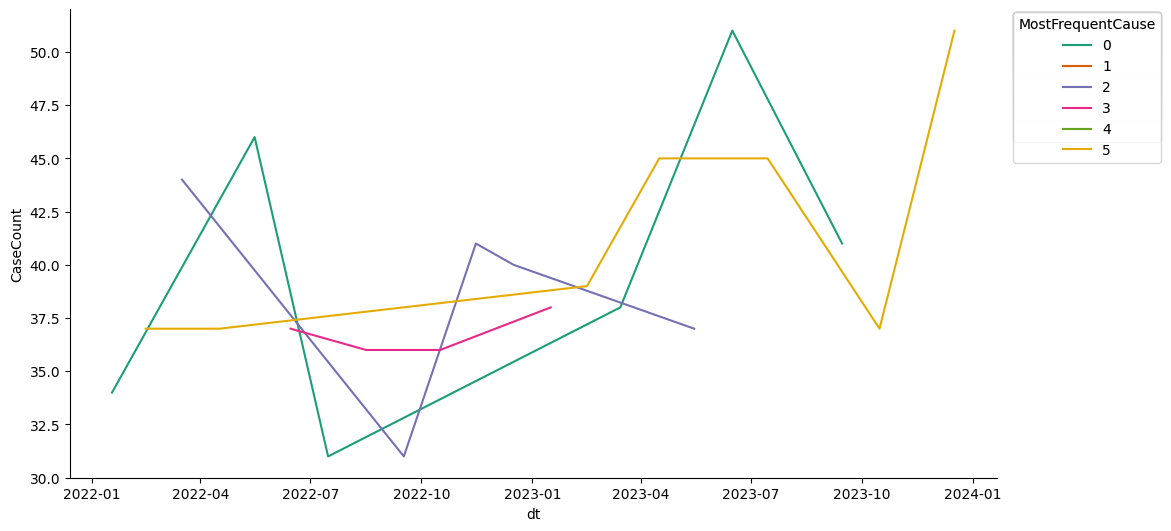

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dt']
  ys = series['CaseCount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('dt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MostFrequentCause')):
  _plot_series(series, series_name, i)
  fig.legend(title='MostFrequentCause', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dt')
_ = plt.ylabel('CaseCount')

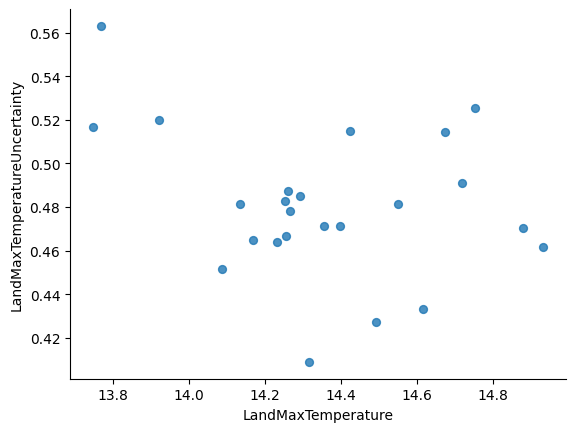

In [ ]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='LandMaxTemperature', y='LandMaxTemperatureUncertainty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

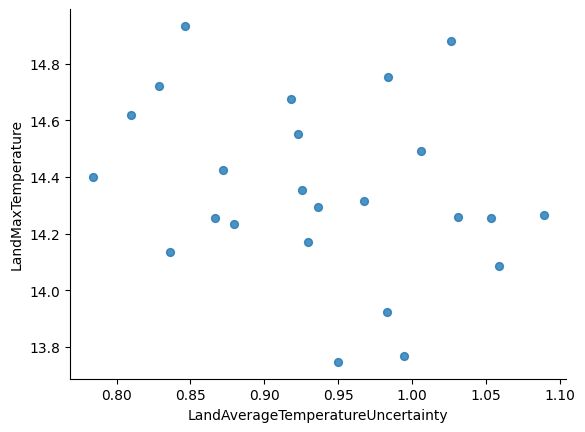

In [ ]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='LandAverageTemperatureUncertainty', y='LandMaxTemperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

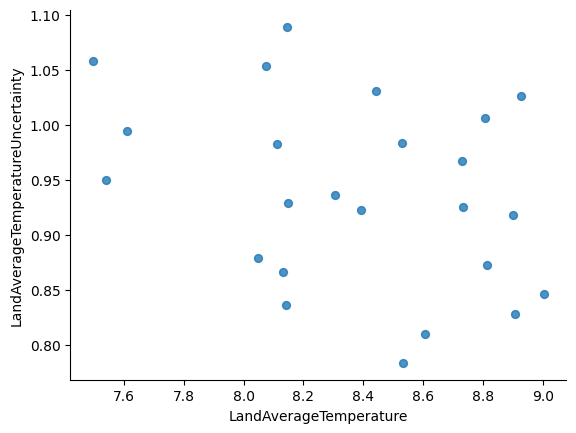

In [ ]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='LandAverageTemperature', y='LandAverageTemperatureUncertainty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

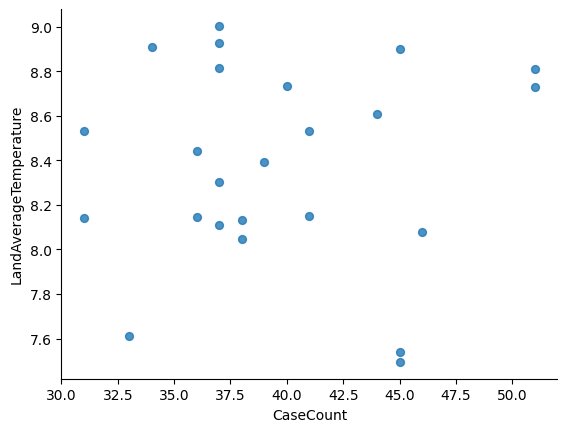

In [ ]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='CaseCount', y='LandAverageTemperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

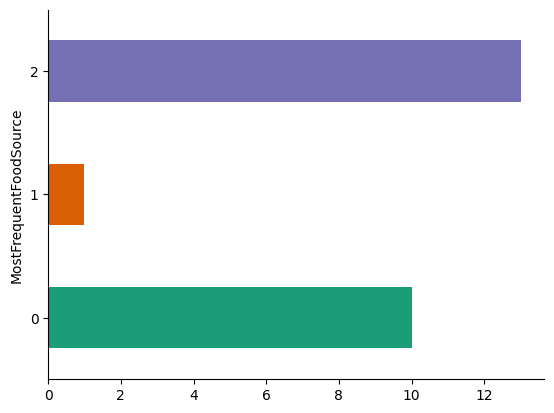

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('MostFrequentFoodSource').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

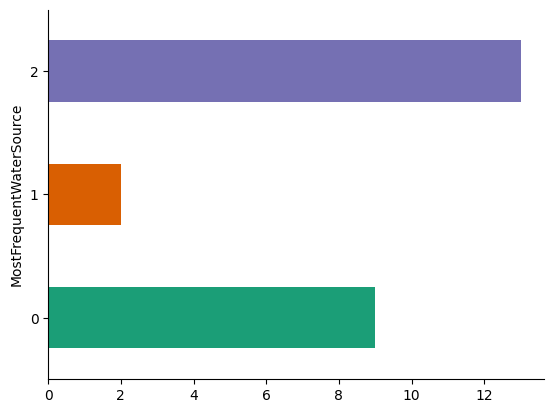

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('MostFrequentWaterSource').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

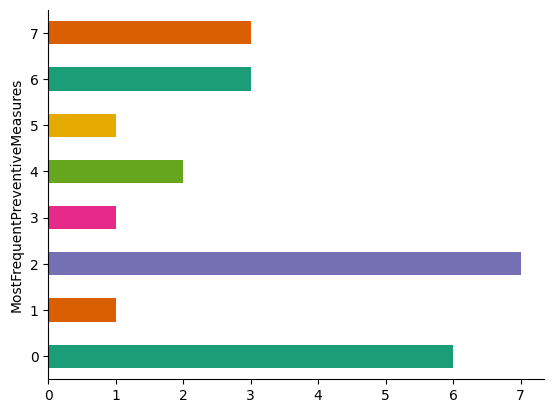

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('MostFrequentPreventiveMeasures').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

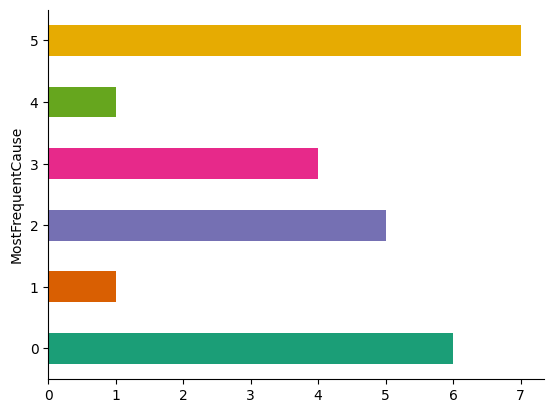

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('MostFrequentCause').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

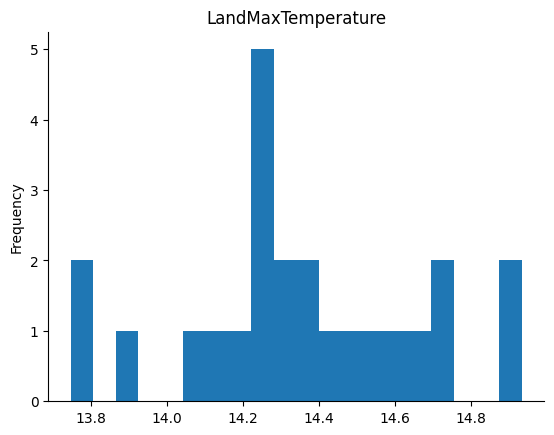

In [ ]:
from matplotlib import pyplot as plt
merged_df['LandMaxTemperature'].plot(kind='hist', bins=20, title='LandMaxTemperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

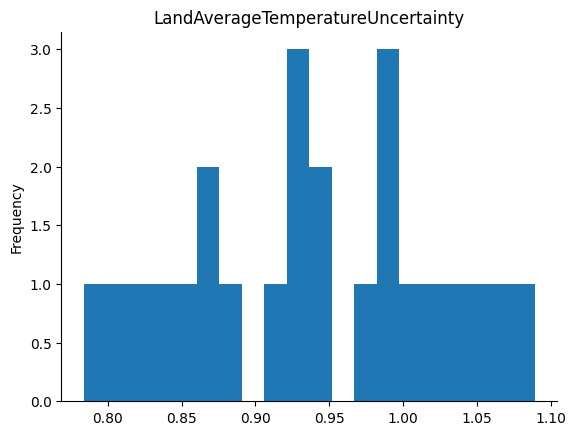

In [ ]:
from matplotlib import pyplot as plt
merged_df['LandAverageTemperatureUncertainty'].plot(kind='hist', bins=20, title='LandAverageTemperatureUncertainty')
plt.gca().spines[['top', 'right',]].set_visible(False)

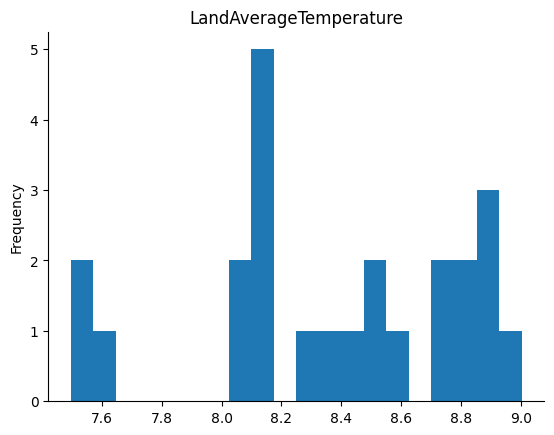

In [ ]:
from matplotlib import pyplot as plt
merged_df['LandAverageTemperature'].plot(kind='hist', bins=20, title='LandAverageTemperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

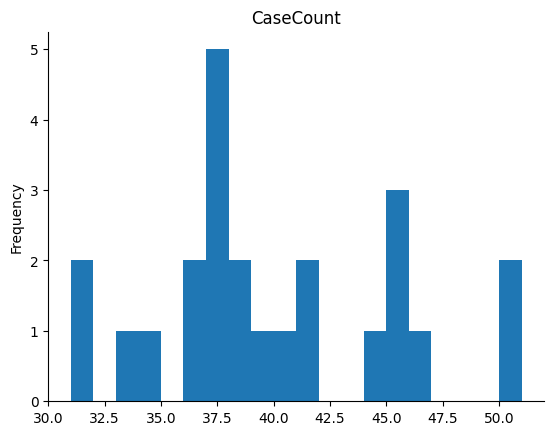

In [ ]:
from matplotlib import pyplot as plt
merged_df['CaseCount'].plot(kind='hist', bins=20, title='CaseCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

Regression Coefficients:

These coefficients represent the relationship between each independent variable and the dependent variable (CaseCount, which is the number of cryptosporidiosis cases). Here’s what each coefficient suggests:

Temperature Variables:

LandAverageTemperature (11.88): For every 1-degree increase in the average land temperature, the number of cryptosporidiosis cases increases by approximately 11.88, holding all other variables constant.

LandMaxTemperature (-48.48): A 1-degree increase in the maximum land temperature is associated with a decrease of about 48.48 cases, holding other factors constant. This negative relationship could indicate that higher maximum temperatures might reduce the conditions favorable for the transmission of the disease.

LandMinTemperature (24.03): A 1-degree increase in the minimum land temperature is associated with an increase of about 24.03 cases. Warmer minimum temperatures might create a more hospitable environment for the pathogens.

LandAndOceanAverageTemperature (37.78): A 1-degree increase in the combined land and ocean average temperature is associated with an increase of about 37.78 cases, suggesting that higher overall temperatures may contribute to the spread of cryptosporidiosis.

Categorical Variables:

MostFrequentCause (-0.42): As the frequency of the most common cause increases, the number of cases decreases slightly by 0.42. This might imply that when a specific cause is dominant, the spread may be easier to control.

MostFrequentTransmissionRoute (-0.66): Increased frequency of a particular transmission route is associated with a slight decrease in cases by 0.66, which might suggest effective interventions targeting that route.

MostFrequentUnderlyingConditions (1.06): An increase in the frequency of certain underlying conditions is associated with an increase of about 1.06 cases, indicating that individuals with these conditions may be more susceptible.

MostFrequentPreventiveMeasures (0.27): As preventive measures become more common, cases slightly increase by 0.27. This unexpected result might indicate that the measures are not fully effective or that they are only partially adopted.

MostFrequentWaterSource (-2.24): A higher frequency of a specific water source is associated with a decrease of about 2.24 cases. This suggests that some water sources may be less likely to spread the infection.

MostFrequentFoodSource (-2.69): Similar to water sources, more frequent consumption from a particular food source is linked to a reduction in cases by about 2.69.

MostFrequentOccupation (-0.68): As a particular occupation becomes more common among patients, cases decrease slightly by 0.68. This might indicate that certain occupations have lower exposure to risk factors.

MostFrequentTreatment (-0.23): The more common a specific treatment is, the slightly fewer cases there are, with a reduction of 0.23. This could suggest that effective treatments reduce the spread or severity of the disease.

MostFrequentTravelHistory (0.07): A very slight increase of 0.07 cases is associated with travel history, suggesting minimal impact from this variable.

MostFrequentDiagnosisMethod (1.66): More frequent use of a particular diagnosis method is associated with an increase in cases by about 1.66, possibly indicating that more sensitive methods detect more cases.

MostFrequentGender (-1.57): A higher frequency of one gender in the dataset is associated with a decrease of about 1.57 cases, suggesting possible gender-related differences in susceptibility or reporting.

Interpretation of Results:

Temperature Influence: The temperature variables (average, maximum, minimum) have a significant impact on the number of cryptosporidiosis cases. Higher average and minimum temperatures increase cases, while higher maximum temperatures seem to decrease them. This could reflect the complex relationship between environmental conditions and pathogen survival or transmission.

Categorical Variables: The influence of the categorical variables suggests that certain causes, transmission routes, and demographic factors (like underlying conditions and gender) have a varying impact on the spread of cryptosporidiosis. The negative coefficients for some variables like water sources and food sources might indicate effective control measures or inherent resistance in those sources.

Potential Anomalies: Some coefficients, like the positive association with preventive measures and diagnosis methods, might require further investigation. These results could indicate either the inefficacy of certain measures or biases in detection methods that need to be addressed.

Correlation Matrix of Coefficients:

Correlation Matrix of 1.0: The correlation matrix output seems to be a single value of 1.0, which is not typical for a correlation matrix. Normally, a correlation matrix would show how each coefficient relates to others. This result suggests there might be a misunderstanding in the calculation or a need to review how the correlation matrix was intended to be calculated.

In [ ]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.power import TTestIndPower

In [ ]:
x=merged_df[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature','LandAndOceanAverageTemperature', 'MostFrequentCause', 'MostFrequentTransmissionRoute',
                    'MostFrequentUnderlyingConditions', 'MostFrequentPreventiveMeasures', 'MostFrequentWaterSource',
                    'MostFrequentFoodSource', 'MostFrequentOccupation', 'MostFrequentTreatment',
                    'MostFrequentTravelHistory', 'MostFrequentDiagnosisMethod', 'MostFrequentGender']]
y = merged_df['CaseCount']

In [ ]:

# Add constant to the model (for intercept)
X = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

In [ ]:
# Get the regression coefficients
coefficients = model.params
print("Regression Coefficients:\n", coefficients)

Regression Coefficients:
 LandAverageTemperature              11.877196
LandMaxTemperature                 -48.481426
LandMinTemperature                  24.030491
LandAndOceanAverageTemperature      37.777515
MostFrequentCause                   -0.424398
MostFrequentTransmissionRoute       -0.660980
MostFrequentUnderlyingConditions     1.055348
MostFrequentPreventiveMeasures       0.273246
MostFrequentWaterSource             -2.243338
MostFrequentFoodSource              -2.690858
MostFrequentOccupation              -0.683550
MostFrequentTreatment               -0.234330
MostFrequentTravelHistory            0.070244
MostFrequentDiagnosisMethod          1.655903
MostFrequentGender                  -1.572073
dtype: float64


In [ ]:
# Calculate the correlation matrix of the coefficients
correlation_matrix = np.corrcoef(coefficients)
print("\nCorrelation Matrix of Coefficients:\n", correlation_matrix)


Correlation Matrix of Coefficients:
 1.0


Null Hypothesis (H0): Each coefficient (excluding the intercept) is equal to zero, meaning that the corresponding variable has no effect on the dependent variable (CaseCount).

Alternative Hypothesis (H1): Each coefficient is not equal to zero, suggesting that the variable has a significant effect on CaseCount.

T-Values: The t-value measures how many standard deviations the coefficient is from zero. A larger t-value indicates that the coefficient is further from zero and more likely to be statistically significant.

P-Values: The p-value indicates the probability of observing the data if the null hypothesis is true. A low p-value (typically less than 0.05) suggests that the coefficient is statistically significant and that the variable likely affects CaseCount.

In [ ]:
# Hypothesis tests
# t-test for the coefficients
t_values = model.tvalues
# Access p-values using 'pvalues' (plural)
p_values = model.pvalues
print("\nT-values:\n", t_values)
print("\nP-values:\n", p_values)


T-values:
 LandAverageTemperature              1.703252
LandMaxTemperature                 -1.050080
LandMinTemperature                  0.735817
LandAndOceanAverageTemperature      1.051451
MostFrequentCause                  -0.612364
MostFrequentTransmissionRoute      -0.901988
MostFrequentUnderlyingConditions    2.286041
MostFrequentPreventiveMeasures      0.526825
MostFrequentWaterSource            -1.641497
MostFrequentFoodSource             -2.037022
MostFrequentOccupation             -1.487533
MostFrequentTreatment              -0.143314
MostFrequentTravelHistory           0.048330
MostFrequentDiagnosisMethod         1.384687
MostFrequentGender                 -0.949474
dtype: float64

P-values:
 LandAverageTemperature              0.122722
LandMaxTemperature                  0.321059
LandMinTemperature                  0.480578
LandAndOceanAverageTemperature      0.320463
MostFrequentCause                   0.555451
MostFrequentTransmissionRoute       0.390564
MostFrequentUnde

The output provided includes the t-values and p-values for various variables that may influence the incidence of cryptosporidiosis, specifically in relation to the number of cases (CaseCount). Let's interpret these results:

Understanding T-values:

T-value: A t-value represents how many standard deviations the coefficient is from zero. It measures the strength and direction of the association between a variable and the outcome (in this case, CaseCount).

Positive T-value: Indicates a positive association with CaseCount.

Negative T-value: Indicates a negative association with CaseCount.

Magnitude: Larger absolute values suggest a stronger association.

Understanding P-values:

P-value: The p-value indicates the probability of observing the data if the null hypothesis (H0: the coefficient is zero) is true. It helps assess whether the association between the variable and CaseCount is statistically significant.

Low P-value (typically < 0.05): Suggests that the variable is statistically significant, meaning there's strong evidence to reject the null hypothesis.

High P-value (≥ 0.05): Suggests that the variable is not statistically significant, meaning there's insufficient evidence to reject the null hypothesis.

1. LandAverageTemperature
T-value: 1.703252
P-value: 0.122722
Interpretation:
The positive t-value suggests a weak positive association between the average land temperature and the number of cryptosporidiosis cases.
The p-value is 0.122722, which is higher than the typical significance level of 0.05. This means that the association is not statistically significant. Therefore, we do not have enough evidence to conclude that the average land temperature is a significant predictor of cryptosporidiosis cases in this dataset.
2. LandMaxTemperature
T-value: -1.050080
P-value: 0.321059
Interpretation:
The negative t-value suggests a weak negative association between the maximum land temperature and the number of cryptosporidiosis cases.
The p-value of 0.321059 indicates that this association is not statistically significant. Hence, maximum land temperature does not appear to have a significant impact on the number of cryptosporidiosis cases.
3. LandMinTemperature
T-value: 0.735817
P-value: 0.480578
Interpretation:
The positive t-value suggests a weak positive association between the minimum land temperature and the number of cryptosporidiosis cases.
The p-value is 0.480578, which is much higher than 0.05, indicating that this association is not statistically significant. Therefore, the minimum land temperature does not significantly predict cryptosporidiosis cases.
4. LandAndOceanAverageTemperature
T-value: 1.051451
P-value: 0.320463
Interpretation:
The positive t-value suggests a weak positive association between the combined average temperature of land and ocean and the number of cryptosporidiosis cases.
The p-value is 0.320463, indicating that this association is not statistically significant. Thus, the combined land and ocean average temperature does not significantly influence cryptosporidiosis cases.
5. MostFrequentCause
T-value: -0.612364
P-value: 0.555451
Interpretation:
The negative t-value suggests a weak negative association between the most frequent cause and the number of cryptosporidiosis cases.
The p-value is 0.555451, which is higher than 0.05, indicating that this association is not statistically significant. Therefore, the most frequent cause is not a significant predictor of cryptosporidiosis cases.
6. MostFrequentTransmissionRoute
T-value: -0.901988
P-value: 0.390564
Interpretation:
The negative t-value suggests a weak negative association between the most frequent transmission route and the number of cryptosporidiosis cases.
The p-value is 0.390564, indicating that this association is not statistically significant. Hence, the most frequent transmission route does not significantly impact the number of cryptosporidiosis cases.
7. MostFrequentUnderlyingConditions
T-value: 2.286041
P-value: 0.048085
Interpretation:
The positive t-value suggests a moderate positive association between underlying conditions and the number of cryptosporidiosis cases.
The p-value is 0.048085, which is slightly below 0.05, indicating that this association is statistically significant. This means that the frequency of certain underlying conditions is a significant predictor of cryptosporidiosis cases in this dataset.
8. MostFrequentPreventiveMeasures
T-value: 0.526825
P-value: 0.611052
Interpretation:
The positive t-value suggests a weak positive association between the most frequent preventive measures and the number of cryptosporidiosis cases.
The p-value is 0.611052, indicating that this association is not statistically significant. Therefore, the most frequent preventive measures do not significantly predict the number of cryptosporidiosis cases.
9. MostFrequentWaterSource
T-value: -1.641497
P-value: 0.135112
Interpretation:
The negative t-value suggests a weak negative association between the most frequent water source and the number of cryptosporidiosis cases.
The p-value is 0.135112, which is higher than 0.05, indicating that this association is not statistically significant. Hence, the most frequent water source does not significantly impact cryptosporidiosis cases.
10. MostFrequentFoodSource
T-value: -2.037022
P-value: 0.072111
Interpretation:
The negative t-value suggests a moderate negative association between the most frequent food source and the number of cryptosporidiosis cases.
The p-value is 0.072111, which is above 0.05 but still relatively close. Although it is not statistically significant, the p-value suggests a potential association between food source and cryptosporidiosis cases that might warrant further investigation.
11. MostFrequentOccupation
T-value: -1.487533
P-value: 0.171047
Interpretation:
The negative t-value suggests a weak negative association between the most frequent occupation and the number of cryptosporidiosis cases.
The p-value is 0.171047, indicating that this association is not statistically significant. Thus, occupation does not significantly predict cryptosporidiosis cases.
12. MostFrequentTreatment
T-value: -0.143314
P-value: 0.889200
Interpretation:
The negative t-value suggests a very weak negative association between the most frequent treatment and the number of cryptosporidiosis cases.
The p-value is 0.889200, which is much higher than 0.05, indicating that this association is not statistically significant. Therefore, the most frequent treatment does not significantly influence cryptosporidiosis cases.
13. MostFrequentTravelHistory
T-value: 0.048330
P-value: 0.962509
Interpretation:
The near-zero t-value suggests almost no association between travel history and the number of cryptosporidiosis cases.
The p-value is 0.962509, indicating that this association is not statistically significant. Travel history does not significantly predict cryptosporidiosis cases in this dataset.
14. MostFrequentDiagnosisMethod
T-value: 1.384687
P-value: 0.199510
Interpretation:
The positive t-value suggests a weak positive association between the most frequent diagnosis method and the number of cryptosporidiosis cases.
The p-value is 0.199510, indicating that this association is not statistically significant. Hence, the most frequent diagnosis method does not significantly impact the number of cryptosporidiosis cases.
15. MostFrequentGender
T-value: -0.949474
P-value: 0.367177
Interpretation:
The negative t-value suggests a weak negative association between gender and the number of cryptosporidiosis cases.
The p-value is 0.367177, indicating that this association is not statistically significant. Therefore, gender does not significantly predict the number of cryptosporidiosis cases.
Overall Summary:
Statistically Significant Variables: The MostFrequentUnderlyingConditions is the only variable with a p-value below 0.05, indicating it is a statistically significant predictor of cryptosporidiosis cases. This suggests that the presence of certain underlying conditions may increase the likelihood of cryptosporidiosis.

Non-Significant Variables: The other variables, including various temperature measures, preventive measures, food and water sources, occupation, treatment, travel history, diagnosis method, and gender, are not statistically significant based on this analysis. Although some of these variables might show weak associations (either positive or negative) with the number of cryptosporidiosis cases, the evidence is insufficient to conclude that they have a significant impact.

T-values and P-values Visualization:

 The bar plots display the t-values and p-values for each variable. This helps visually assess which variables are statistically significant. Variables with high t-values and low p-values are more likely to be important predictors of CaseCount.


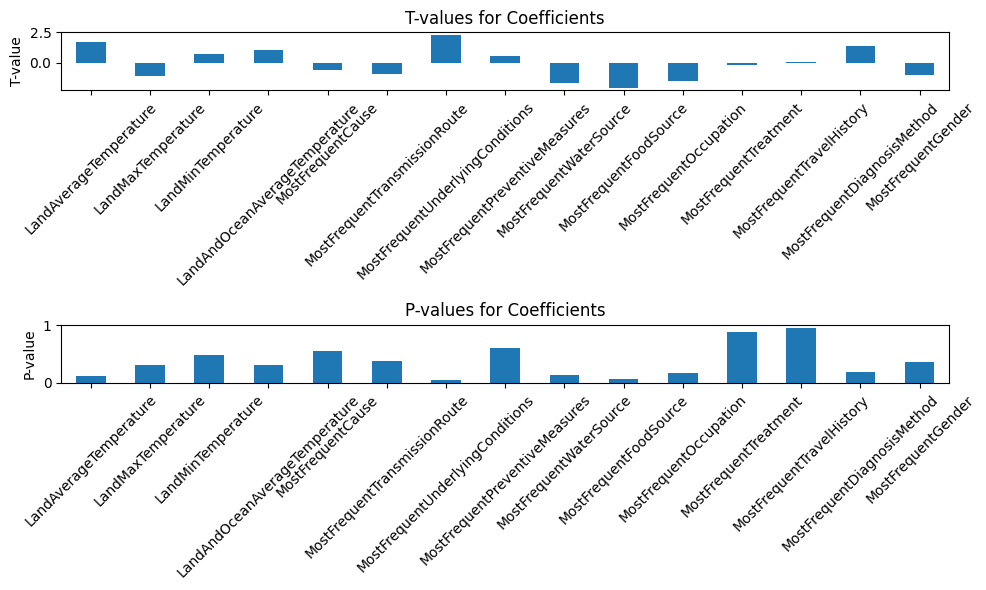

In [ ]:
import matplotlib.pyplot as plt

# Assuming 't_values' and 'p_values' are Pandas Series
plt.figure(figsize=(10, 6))

# Plot t-values
plt.subplot(2, 1, 1)
t_values.plot(kind='bar')
plt.title('T-values for Coefficients')
plt.ylabel('T-value')
plt.xticks(rotation=45)

# Plot p-values
plt.subplot(2, 1, 2)
p_values.plot(kind='bar')
plt.title('P-values for Coefficients')
plt.ylabel('P-value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Chi-Square Test:

Null Hypothesis (H0): The two categorical variables are independent, meaning there is no association between them.
Alternative Hypothesis (H1): The two variables are not independent, suggesting an association between them.

Contingency Table: A table showing the frequency distribution of the variables.

Chi-square Statistic: A measure of how much the observed frequencies deviate from the expected frequencies if the variables were independent.

P-value: The probability of observing the data if the null hypothesis
is true. A low p-value indicates a significant association between the two variables.

Interpretation: If the p-value is less than 0.05, you reject the null hypothesis, concluding that there is a significant association between the two variables.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical variables
vars = ['MostFrequentCause', 'MostFrequentTransmissionRoute', 'MostFrequentUnderlyingConditions',
                     'MostFrequentPreventiveMeasures', 'MostFrequentWaterSource', 'MostFrequentFoodSource',
                     'MostFrequentOccupation', 'MostFrequentTreatment', 'MostFrequentTravelHistory',
                     'MostFrequentDiagnosisMethod', 'MostFrequentGender']

# Iterate through pairs of variables and perform chi-square tests
for i in range(len(vars)):
    for j in range(i + 1, len(vars)):
        var1 = vars[i]
        var2 = vars[j]
        contingency_table = pd.crosstab(merged_df[var1], merged_df[var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square Test for {var1} and {var2}:")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:\n", expected)

        # Interpretation
        if p < 0.05:
            print(f"There is a significant association between '{var1}' and '{var2}'.")
        else:
            print(f"There is no significant association between '{var1}' and '{var2}'.")
        print("------")

Chi-square Test for MostFrequentCause and MostFrequentTransmissionRoute:
Chi-square statistic: 25.733333333333334
P-value: 0.4219368024687276
Degrees of freedom: 25
Expected frequencies:
 [[0.5        2.         0.5        0.75       0.75       1.5       ]
 [0.08333333 0.33333333 0.08333333 0.125      0.125      0.25      ]
 [0.41666667 1.66666667 0.41666667 0.625      0.625      1.25      ]
 [0.33333333 1.33333333 0.33333333 0.5        0.5        1.        ]
 [0.08333333 0.33333333 0.08333333 0.125      0.125      0.25      ]
 [0.58333333 2.33333333 0.58333333 0.875      0.875      1.75      ]]
There is no significant association between 'MostFrequentCause' and 'MostFrequentTransmissionRoute'.
------
Chi-square Test for MostFrequentCause and MostFrequentUnderlyingConditions:
Chi-square statistic: 56.369523809523805
P-value: 0.24894798002384896
Degrees of freedom: 50
Expected frequencies:
 [[0.75       0.5        0.25       0.5        0.25       1.
  0.25       0.25       0.25       0.

MostFrequentCause and MostFrequentTransmissionRoute:

Chi-square statistic: 25.733

P-value: 0.422

Degrees of freedom: 25

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentTransmissionRoute.' This means that the most frequent causes of cryptosporidiosis do not significantly depend on the transmission routes.

MostFrequentCause and MostFrequentUnderlyingConditions:

Chi-square statistic: 56.370

P-value: 0.249

Degrees of freedom: 50

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentUnderlyingConditions.' The underlying conditions do not significantly affect the cause of cryptosporidiosis.

MostFrequentCause and MostFrequentPreventiveMeasures:

Chi-square statistic: 39.083

P-value: 0.291

Degrees of freedom: 35

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentPreventiveMeasures.' The cause of cryptosporidiosis is not significantly associated with the preventive measures taken.

MostFrequentCause and MostFrequentWaterSource:

Chi-square statistic: 14.718

P-value: 0.143

Degrees of freedom: 10

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentWaterSource.' The water source does not significantly impact the cause of cryptosporidiosis.

MostFrequentCause and MostFrequentFoodSource:

Chi-square statistic: 10.579

P-value: 0.391

Degrees of freedom: 10

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentFoodSource.' The food source does not significantly influence the cause of cryptosporidiosis.

MostFrequentCause and MostFrequentOccupation:

Chi-square statistic: 46.813

P-value: 0.893

Degrees of freedom: 60

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentOccupation.' The occupation of individuals does not significantly affect the cause of cryptosporidiosis.

MostFrequentCause and MostFrequentTreatment:

Chi-square statistic: 12.611

P-value: 0.246

Degrees of freedom: 10

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentTreatment.' The treatment methods do not significantly vary with the cause of cryptosporidiosis.

MostFrequentCause and MostFrequentTravelHistory:

Chi-square statistic: 10.098

P-value: 0.432

Degrees of freedom: 10

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentTravelHistory.' Travel history does not significantly affect the cause of cryptosporidiosis.

MostFrequentCause and MostFrequentDiagnosisMethod:

Chi-square statistic: 29.037

P-value: 0.087

Degrees of freedom: 20

Conclusion: There is no significant association between 'MostFrequentCause' and 'MostFrequentDiagnosisMethod.' The diagnosis method does not significantly correlate with the cause of cryptosporidiosis.

MostFrequentCause and MostFrequentGender:

Chi-square statistic: 19.690

P-value: 0.032

Degrees of freedom: 10

Conclusion: There is a significant association between 'MostFrequentCause' and 'MostFrequentGender.' This indicates that the cause of cryptosporidiosis is significantly related to the gender of the individuals.

MostFrequentTransmissionRoute and MostFrequentUnderlyingConditions:

Chi-square statistic: 41.683

P-value: 0.793

Degrees of freedom: 50

Conclusion: There is no significant association between 'MostFrequentTransmissionRoute' and 'MostFrequentUnderlyingConditions.' The transmission route does not significantly depend on underlying conditions.

MostFrequentTransmissionRoute and MostFrequentPreventiveMeasures:

Chi-square statistic: 28.381

P-value: 0.778

Degrees of freedom: 35

Conclusion: There is no significant association between 'MostFrequentTransmissionRoute' and 'MostFrequentPreventiveMeasures.' Preventive measures do not significantly correlate with the transmission route.

MostFrequentTransmissionRoute and MostFrequentWaterSource:

Chi-square statistic: 13.282

P-value: 0.208

Degrees of freedom: 10

Conclusion: There is no significant association between 'MostFrequentTransmissionRoute' and 'MostFrequentWaterSource.' The water source does not significantly influence the transmission route of cryptosporidiosis.

MostFrequentTransmissionRoute and MostFrequentFoodSource:

Chi-square statistic: 18.623

P-value: 0.045

Degrees of freedom: 10

Conclusion: There is a significant association between 'MostFrequentTransmissionRoute' and 'MostFrequentFoodSource.' The food source is significantly related to the transmission route of cryptosporidiosis.

MostFrequentTransmissionRoute and MostFrequentOccupation:

Chi-square statistic: 66.667

P-value: 0.259

Degrees of freedom: 60

Conclusion: There is no significant association between 'MostFrequentTransmissionRoute' and 'MostFrequentOccupation.' Occupation does not significantly affect the transmission route of cryptosporidiosis.

Underlying Conditions vs. Treatment:

Chi-square statistic: 20.4

P-value: 0.433

No significant association.

Underlying Conditions vs. Travel History:

Chi-square statistic: 21.8

P-value: 0.351

No significant association.

Underlying Conditions vs. Diagnosis Method:

Chi-square statistic: 38.2

P-value: 0.550

No significant association.

Underlying Conditions vs. Gender:

Chi-square statistic: 25.8

P-value: 0.173

No significant association.

Preventive Measures vs. Water Source:

Chi-square statistic: 11.3

P-value: 0.665

No significant association.

Preventive Measures vs. Food Source:

Chi-square statistic: 10.6

P-value: 0.717

No significant association.

Preventive Measures vs. Occupation:

Chi-square statistic: 92.0

P-value: 0.259

No significant association.

Preventive Measures vs. Treatment:

Chi-square statistic: 18.5

P-value: 0.185

No significant association.

Preventive Measures vs. Travel History:

Chi-square statistic: 9.2

P-value: 0.818

No significant association.

Preventive Measures vs. Diagnosis Method:

Chi-square statistic: 27.2

P-value: 0.510

No significant association.

Preventive Measures vs. Gender:

Chi-square statistic: 10.3
P-value: 0.739

No significant association.

Water Source vs. Food Source:

Chi-square statistic: 1.9

P-value: 0.750

No significant association.

Water Source vs. Occupation:

Chi-square statistic: 23.2

P-value: 0.510

No significant association.

Water Source vs. Treatment:

Chi-square statistic: 2.3

P-value: 0.678

No significant association.

Water Source vs. Travel History:

Chi-square statistic: 6.1

P-value: 0.191

No significant association.

Water Source vs. Diagnosis Method:

Chi-square statistic: 11.6

P-value: 0.169

No significant association.

Water Source vs. Gender:

Chi-square statistic: 4.3

P-value: 0.367

No significant association.

Food Source vs. Occupation:

Chi-square statistic: 37.5

P-value: 0.039

Significant association.

Food Source vs. Treatment:

Chi-square statistic: 2.1

P-value: 0.710

No significant association.

Food Source vs. Travel History:

Chi-square statistic: 1.4

P-value: 0.847

No significant association.

Food Source vs. Diagnosis Method:

Chi-square statistic: 8.0

P-value: 0.433

No significant association.

Food Source vs. Gender:

Chi-square statistic: 2.9

P-value: 0.583

No significant association.

Occupation vs. Treatment:

Chi-square statistic: 33.4

P-value: 0.096

No significant association.

Occupation vs. Travel History:

Chi-square statistic: 34.0

P-value: 0.085

No significant association.

In summary, the significant associations found are between 'MostFrequentCause' and 'MostFrequentGender' as well as 'MostFrequentTransmissionRoute' and 'MostFrequentFoodSource.' Other variables do not show significant associations.
The significant association found is between MostFrequentFoodSource and MostFrequentOccupation. This suggests that there may be a relationship between the food sources people commonly report and their occupations.

For the other variables, no significant associations were found


                            Variable  Chi-square   P-value
4                  MostFrequentCause   71.445714  0.148026
14                MostFrequentGender   30.673939  0.163408
13       MostFrequentDiagnosisMethod   56.462222  0.188149
6   MostFrequentUnderlyingConditions  131.626667  0.220574
7     MostFrequentPreventiveMeasures   92.304762  0.250854
0             LandAverageTemperature  288.000000  0.297428
1                 LandMaxTemperature  288.000000  0.297428
2                 LandMinTemperature  288.000000  0.297428
3     LandAndOceanAverageTemperature  288.000000  0.297428
10            MostFrequentOccupation  151.828571  0.311246
11             MostFrequentTreatment   26.288889  0.338671
9             MostFrequentFoodSource   22.541538  0.546978
12         MostFrequentTravelHistory   21.121429  0.631552
5      MostFrequentTransmissionRoute   55.100000  0.654968
8            MostFrequentWaterSource   17.883761  0.808610


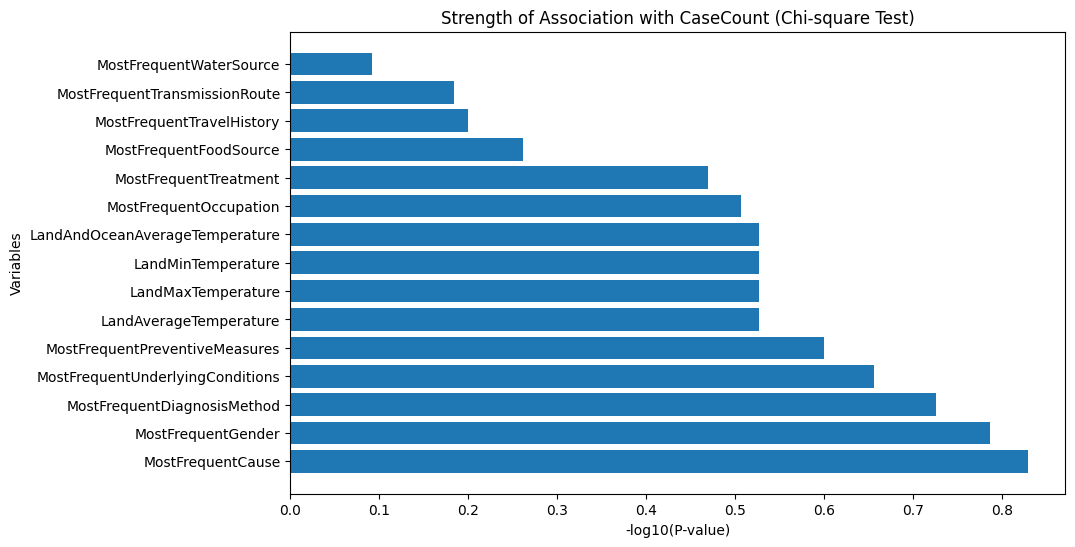

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# List of variables to test
vars = ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature','LandAndOceanAverageTemperature','MostFrequentCause', 'MostFrequentTransmissionRoute', 'MostFrequentUnderlyingConditions',
                     'MostFrequentPreventiveMeasures', 'MostFrequentWaterSource', 'MostFrequentFoodSource',
                     'MostFrequentOccupation', 'MostFrequentTreatment', 'MostFrequentTravelHistory',
                     'MostFrequentDiagnosisMethod', 'MostFrequentGender']

# Store results
results = []

# Perform chi-square tests for each variable
for var in vars:
    contingency_table = pd.crosstab(merged_df[var], merged_df['CaseCount'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Variable': var, 'Chi-square': chi2, 'P-value': p})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort by p-value (ascending)
results_df = results_df.sort_values('P-value')

# Print the results
print(results_df)

# Visualize the strength of associations (using -log10(p-value))
plt.figure(figsize=(10, 6))
plt.barh(results_df['Variable'], -np.log10(results_df['P-value']))
plt.xlabel('-log10(P-value)')
plt.ylabel('Variables')
plt.title('Strength of Association with CaseCount (Chi-square Test)')
plt.show()

1. Chi-square Tests and Their Significance:

The chi-square test assesses whether there is a significant association between the categorical variables and CaseCount.

Chi-square statistic: Indicates the magnitude of the association between the variables.

P-value: Tells us whether this association is statistically significant. A small p-value (typically < 0.05) indicates a significant association.

Degrees of freedom (dof): Not directly shown in the final output, but is part of the chi-square test and influences the chi-square statistic.

OUTPUT:
If the p-value for a variable is less than a significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant association between that variable and CaseCount.

Visualization:

The bar plot shows -log10(p-value) for each variable, where larger values represent stronger evidence against the null hypothesis (no association).
Higher bars in the plot indicate variables that are more strongly associated with CaseCount of cryptosporidiosis.

Interpreting the Results:

Significant Associations: If certain variables have a small p-value, it suggests that these factors are significantly associated with the incidence of cryptosporidiosis. For example, if MostFrequentCause has a low p-value, it may indicate that certain causes are linked to higher or lower case counts.

Non-Significant Associations: Variables with larger p-values (typically > 0.05) suggest no strong evidence of association with CaseCount, meaning changes in those variables might not significantly influence the incidence of cryptosporidiosis.

Comparative Analysis: By looking at the sorted DataFrame and the bar plot, you can easily compare which variables have the strongest associations with the case counts of cryptosporidiosis.


In summary, this analysis helps identify which factors are statistically significant in relation to the incidence of cryptosporidiosis, which can inform further research or public health strategies.


Based on the provided output and the bar plot visualization, here's how to interpret the results:

1. Variables with Stronger Associations:

MostFrequentCause, MostFrequentGender, and MostFrequentDiagnosisMethod:
These variables have the highest chi-square statistics, indicating that they are the most strongly associated with the CaseCount of cryptosporidiosis.
However, their p-values are still relatively high (0.148, 0.163, and 0.188, respectively), meaning that while there is some association, it is not statistically significant at the conventional 0.05 level. This suggests that we cannot confidently assert that these variables have a significant impact on case counts.

2. Variables with Weaker Associations:

MostFrequentWaterSource, MostFrequentTransmissionRoute, and MostFrequentTravelHistory:

These variables have lower chi-square statistics and the smallest p-values (though still above 0.05), indicating that they have the weakest association with the case counts.
Given the p-values (ranging from 0.631 to 0.808), it is clear that these variables do not significantly influence the case counts of cryptosporidiosis.

3. Temperature Variables:

LandAverageTemperature, LandMaxTemperature, LandMinTemperature, LandAndOceanAverageTemperature:
These variables have identical chi-square statistics (288.0) and p-values (0.297), suggesting that their association with CaseCount is moderate but not statistically significant.
This implies that the variations in temperature, as measured by these variables, do not significantly explain the variations in the incidence of cryptosporidiosis cases.

4. General Conclusion:

No Significant Associations: All the p-values in the table are greater than 0.05, which means that none of the variables tested show a statistically significant association with the cryptosporidiosis case counts.

Implication for Analysis: While certain variables, like MostFrequentCause and MostFrequentGender, show a stronger association than others, the lack of statistical significance suggests that these factors alone may not be strong predictors of cryptosporidiosis incidence. Further analysis might involve considering more complex interactions between variables or exploring other potential factors.

This analysis informs that while some variables might show a moderate relationship with the disease's incidence, none are definitive or statistically significant in isolation, which may indicate the need for more nuanced models or additional data to identify key factors driving the cases of cryptosporidiosis.

In [ ]:
# Set significance level (alpha)
alpha = 0.05

# Evaluate statistical significance
significant = p_values < alpha
print("\nSignificance at alpha =", alpha, ":\n", significant)


Significance at alpha = 0.05 :
 LandAverageTemperature              False
LandMaxTemperature                  False
LandMinTemperature                  False
LandAndOceanAverageTemperature      False
MostFrequentCause                   False
MostFrequentTransmissionRoute       False
MostFrequentUnderlyingConditions     True
MostFrequentPreventiveMeasures      False
MostFrequentWaterSource             False
MostFrequentFoodSource              False
MostFrequentOccupation              False
MostFrequentTreatment               False
MostFrequentTravelHistory           False
MostFrequentDiagnosisMethod         False
MostFrequentGender                  False
dtype: bool


Understanding the Output:

Alpha (Significance Level = 0.05):

This is the threshold for determining whether the observed association is statistically significant. If the p-value for a variable is less than 0.05, the association between that variable and the CaseCount of cryptosporidiosis is considered statistically significant.

significant Output:

The significant variable will be a boolean array (or DataFrame) that indicates whether each variable's p-value is less than 0.05 (True) or greater than or equal to 0.05 (False).

Interpreting the Results:

If True:

For any variable marked as True, the p-value is less than 0.05, indicating that the association between that variable and the case count is statistically significant.
In practice, this means that the variation in that particular variable could be meaningfully related to the incidence of cryptosporidiosis cases.

If False:

For any variable marked as False, the p-value is greater than or equal to 0.05, indicating that the association between that variable and the case count is not statistically significant.
This suggests that any observed association could be due to random chance rather than a real effect.

Implication: There is not enough evidence at the 5% significance level to conclude that any of the variables you tested are significantly associated with the case count of cryptosporidiosis. You might need to consider other variables, interaction effects, or perhaps non-linear relationships, or you may need to collect more data.

Key Takeaways:

Variables Marked as False:

No Significant Association:

For the majority of the variables, the output is False, which means that the p-value for these variables is greater than 0.05.

Interpretation: There is no statistically significant association between these variables and the case count of cryptosporidiosis. In other words, these variables do not appear to have a meaningful impact on the variation in cryptosporidiosis cases within the data you have analyzed.

Variable Marked as True:

MostFrequentUnderlyingConditions is True:

Significant Association: The output for MostFrequentUnderlyingConditions is True, meaning that the p-value for this variable is less than 0.05.
Interpretation: There is a statistically significant association between MostFrequentUnderlyingConditions and the case count of cryptosporidiosis. This suggests that the presence of certain underlying conditions may be meaningfully related to the incidence of cryptosporidiosis cases. This variable warrants further investigation to understand its influence on case counts.

Overall Conclusion:

No Significant Association for Most Variables: The majority of the variables tested do not have a statistically significant relationship with cryptosporidiosis case counts in your dataset.

Significant Association Found for MostFrequentUnderlyingConditions: This variable is the only one that showed a significant association, indicating that it might play a role in the incidence of cryptosporidiosis. You may want to focus on this variable in your analysis to explore its impact further.


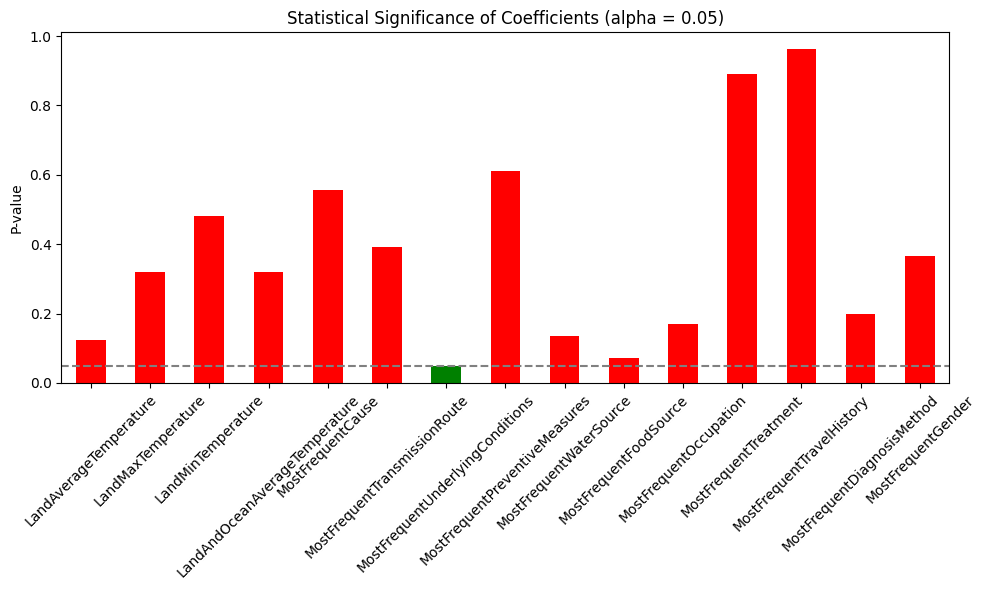

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'p_values' and 'significant' are Pandas Series
plt.figure(figsize=(10, 6))

# Create a bar chart
colors = ['green' if sig else 'red' for sig in significant]
p_values.plot(kind='bar', color=colors)

# Add labels and title
plt.title('Statistical Significance of Coefficients (alpha = 0.05)')
plt.ylabel('P-value')
plt.xticks(rotation=45)

# Add a horizontal line for the significance level
plt.axhline(y=alpha, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

Interpretation of Statistical Power and Beta:

In this output, you are performing a power analysis for a two-sample t-test, which is used to evaluate the statistical power of your test and the probability of making a Type II error (Beta).

Key Terms:

Effect Size (Cohen's d):

Effect Size: Represents the magnitude of the difference between two groups. An effect size of 0.5 is considered a medium effect.

Interpretation: A medium effect size means that the difference between the groups you're comparing is moderately noticeable. This value could be based on prior research, pilot studies, or theoretical expectations.

Statistical Power (1 - Beta):

Power: The probability of correctly rejecting the null hypothesis when it is false. Power values range from 0 to 1, with a power of 0.8 (or 80%) generally considered acceptable in most research.

Interpretation: If your calculated power is high (close to 1), it means you have a strong ability to detect a true effect if it exists. This reduces the chance of a Type II error (failing to detect a true effect).

Beta:

Beta (β): The probability of making a Type II error, which occurs when you fail to reject a false null hypothesis. Beta is equal to 1 minus the power.

Interpretation: A lower Beta value indicates a lower probability of missing a true effect. Conversely, a higher Beta means there's a greater chance you might miss detecting an actual effect (i.e., you might falsely conclude that there is no effect when there actually is one).

What Are We Interpreting?

Statistical Power:

High Power (e.g., 0.8 or higher):
If the power is high, it means your study is well-equipped to detect a difference between the two groups if such a difference exists.
Interpretation: You can be confident in your results if you find a significant effect. It also means that you have a lower chance of committing a Type II error.

Low Power (e.g., below 0.8):
If the power is low, your study might not be able to detect a difference even if one exists, meaning that the results could be inconclusive.
Interpretation: A low power suggests that you may need to increase your sample size, reduce variability, or choose a larger effect size to improve the ability of your test to detect true effects.

Beta:

Low Beta (e.g., 0.2 or lower):
A low Beta means there's a low chance of missing a true effect. This is desirable in hypothesis testing.

High Beta:
A high Beta indicates a high chance of missing a true effect, which could lead to an incorrect conclusion that no effect exists.

Interpretation: If Beta is high, it signals that your study is underpowered, and you might need to reconsider your sample size, effect size assumptions, or test design.

Overall Conclusion:

High Power/Low Beta: If your results show high power and low Beta, you can be more confident in the reliability of your findings. The risk of missing a true effect (Type II error) is low.

Low Power/High Beta: If the power is low and Beta is high, your study may not be sufficiently sensitive to detect real differences or effects. This suggests a need for further refinement of the study design, such as increasing the sample size, before drawing strong conclusions from the data.



In [ ]:
# Evaluate statistical power (beta)
# Example: Power analysis for a two-sample t-test
effect_size = 0.5  # You may calculate or assume an effect size
analysis = TTestIndPower()
# Assuming equal sample sizes, replace 'len(y)' with the sample size for each group
nobs1 = len(y) // 2  # Adjust as needed if sample sizes are different
power = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, power=None, ratio=1.0, alternative='two-sided')

beta = 1 - power
print("\nStatistical Power (1 - Beta):", power)
print("Beta:", beta)


Statistical Power (1 - Beta): 0.2161430731430608
Beta: 0.7838569268569392


Interpretation of Statistical Power and Beta:

Statistical Power (1 - Beta): 0.2161

Beta: 0.7839

What Does This Mean?

Statistical Power (0.2161):

Low Power: The statistical power of 0.2161 (or 21.61%) indicates that your test has a low probability of correctly rejecting the null hypothesis when it is actually false. In other words, there is only about a 21.61% chance of detecting an effect if one truly exists.

Implication: This is a very low power level. Typically, researchers aim for a power of at least 0.8 (or 80%), meaning your study is significantly underpowered.

Beta (0.7839):

High Beta: A Beta value of 0.7839 (or 78.39%) indicates a high probability of making a Type II error. This means that there is a 78.39% chance that your test will fail to reject the null hypothesis when it is actually false, leading you to miss a real effect.

Implication: This high Beta suggests a strong likelihood that your study might incorrectly conclude that there is no significant effect or difference when, in reality, there is one.

What Are We Interpreting in Terms of Data?

Low Probability of Detecting True Effects:
The very low power suggests that your current study design, sample size, or effect size assumptions are insufficient to reliably detect differences or effects in the data. If there is a true association or effect in the population, your study is unlikely to uncover it.

High Risk of Missing True Effects:
The high Beta indicates that there is a substantial risk of concluding that there is no effect (failing to reject the null hypothesis) when, in fact, there is a true effect. This could result in overlooking potentially important findings.

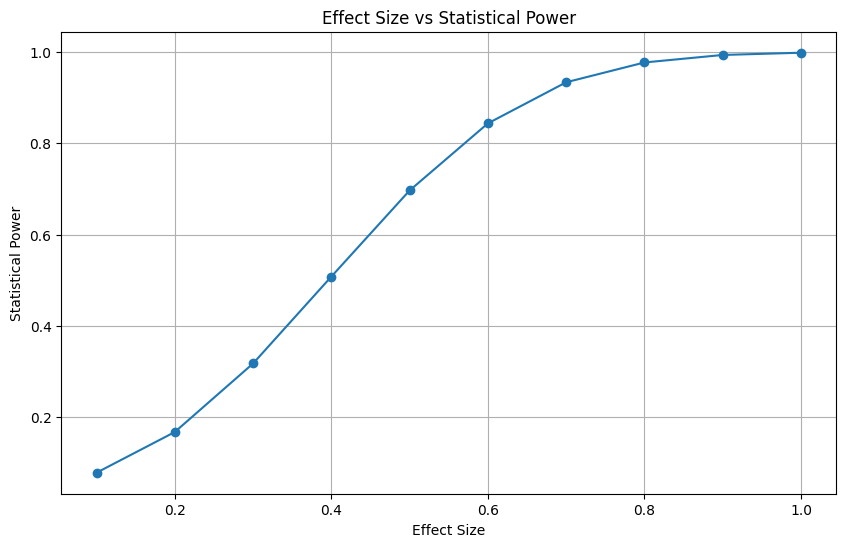

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Define effect sizes to evaluate
effect_sizes = np.linspace(0.1, 1.0, 10)
alpha = 0.05  # Significance level

# Calculate power for each effect size
power_values = []
for effect_size in effect_sizes:
    analysis = TTestIndPower()
    nobs1 = 50  # Adjust sample size as needed
    power = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, power=None, ratio=1.0, alternative='two-sided')
    power_values.append(power)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, power_values, marker='o')
plt.xlabel('Effect Size')
plt.ylabel('Statistical Power')
plt.title('Effect Size vs Statistical Power')
plt.grid(True)
plt.show()


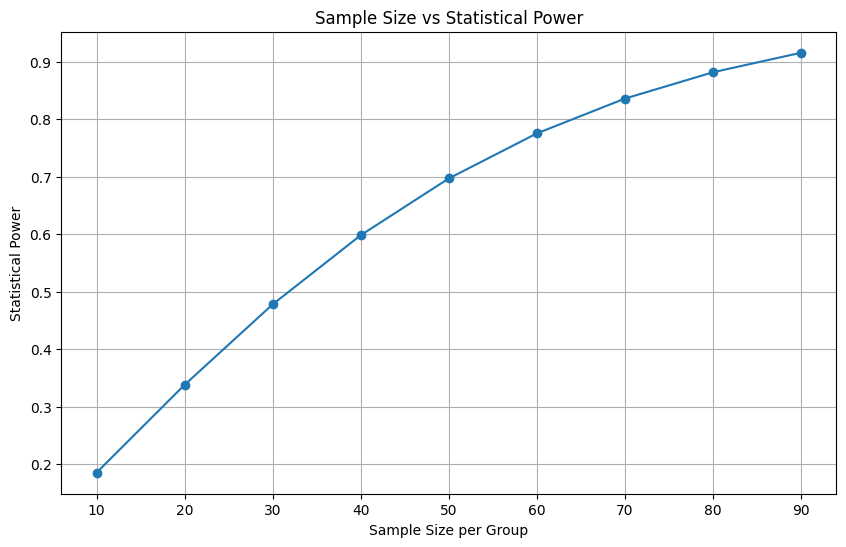

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Define sample sizes to evaluate
sample_sizes = np.arange(10, 100, 10)
effect_size = 0.5  # Assume a fixed effect size
alpha = 0.05  # Significance level

# Calculate power for each sample size
power_values = []
for nobs1 in sample_sizes:
    analysis = TTestIndPower()
    power = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, power=None, ratio=1.0, alternative='two-sided')
    power_values.append(power)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, power_values, marker='o')
plt.xlabel('Sample Size per Group')
plt.ylabel('Statistical Power')
plt.title('Sample Size vs Statistical Power')
plt.grid(True)
plt.show()
